# Projeto

## Setup Inicial e carregamento da base de dados.

In [3]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carregar dados
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [7]:
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

## Divis√£o entre treino e testes. Mantendo a propor√ß√£o original (feita ap√≥s ver o balanceamento das clases)

In [43]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,   # 20% para teste
    random_state=42, # para reprodutibilidade
    stratify=y       # mant√©m propor√ß√£o das classes
)

In [45]:
y.value_counts(normalize=True),

(Diabetes_binary
 0.0    0.860667
 1.0    0.139333
 Name: proportion, dtype: float64,)

In [46]:
y_train.value_counts(normalize=True),

(Diabetes_binary
 0.0    0.860666
 1.0    0.139334
 Name: proportion, dtype: float64,)

In [47]:
y_test.value_counts(normalize=True)

Diabetes_binary
0.0    0.860671
1.0    0.139329
Name: proportion, dtype: float64

## Explora√ß√£o inicial dos dados.

In [48]:
## verificando a forma.

In [67]:
X_train.shape

(202944, 21)

In [50]:
## verificando o nome da cada coluna. 

In [68]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [52]:
## verificando tipos

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 153147 to 206060
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                202944 non-null  float64
 1   HighChol              202944 non-null  float64
 2   CholCheck             202944 non-null  float64
 3   BMI                   202944 non-null  float64
 4   Smoker                202944 non-null  float64
 5   Stroke                202944 non-null  float64
 6   HeartDiseaseorAttack  202944 non-null  float64
 7   PhysActivity          202944 non-null  float64
 8   Fruits                202944 non-null  float64
 9   Veggies               202944 non-null  float64
 10  HvyAlcoholConsump     202944 non-null  float64
 11  AnyHealthcare         202944 non-null  float64
 12  NoDocbcCost           202944 non-null  float64
 13  GenHlth               202944 non-null  float64
 14  MentHlth              202944 non-null  float64
 15  

In [54]:
## Vendo assim podemos notar que existem muitos valores binarios na base de dados.

In [70]:
X_train.describe()

HighBP       HighChol      CholCheck            BMI  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean        0.428995       0.424304       0.962418      28.377961   
std         0.494934       0.494238       0.190183       6.598293   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  202944.000000  202944.000000         202944.000000  202944.000000   
mean        0.442861       0.040405              0.094248       0.756992   
std         0.496726       0.196908              0.292174       0.428901   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       1.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  ...  AnyHealthcare    NoDocbcCost  \
count  202944.000000  202944.000000  ...  202944.000000  202944.000000   
mean        0.634426       0.811426  ...       0.951149       0.084624   
std         0.481592       0.391171  ...       0.215557       0.278323   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       1.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean        2.511836       3.189796       4.250818       0.168160   
std         1.068378       7.417614       8.725646       0.374009   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  202944.000000  202944.000000  202944.000000  202944.000000  
mean        0.441013       8.032827       5.049925       6.050832  
std         0.496510       3.051388       0.986384       2.072661  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 21 columns]

In [71]:
# Verificar se h√° valores nulos. 
X_train.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [57]:
## Verificando o balanceamento das clases. 

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


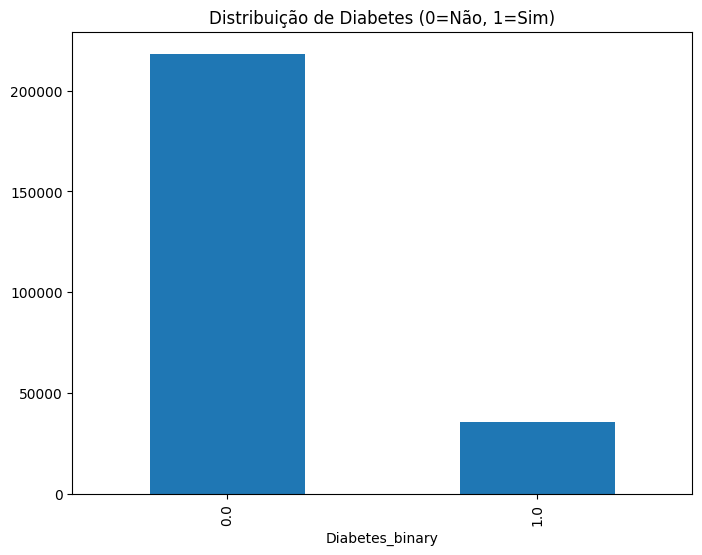

In [78]:


# Distribui√ß√£o da target
print(df['Diabetes_binary'].value_counts(normalize=True))
plt.figure(figsize=(8,6))
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.title('Distribui√ß√£o de Diabetes (0=N√£o, 1=Sim)')
plt.show()

In [60]:
## A classe alvo √© muito desbalanceada. 

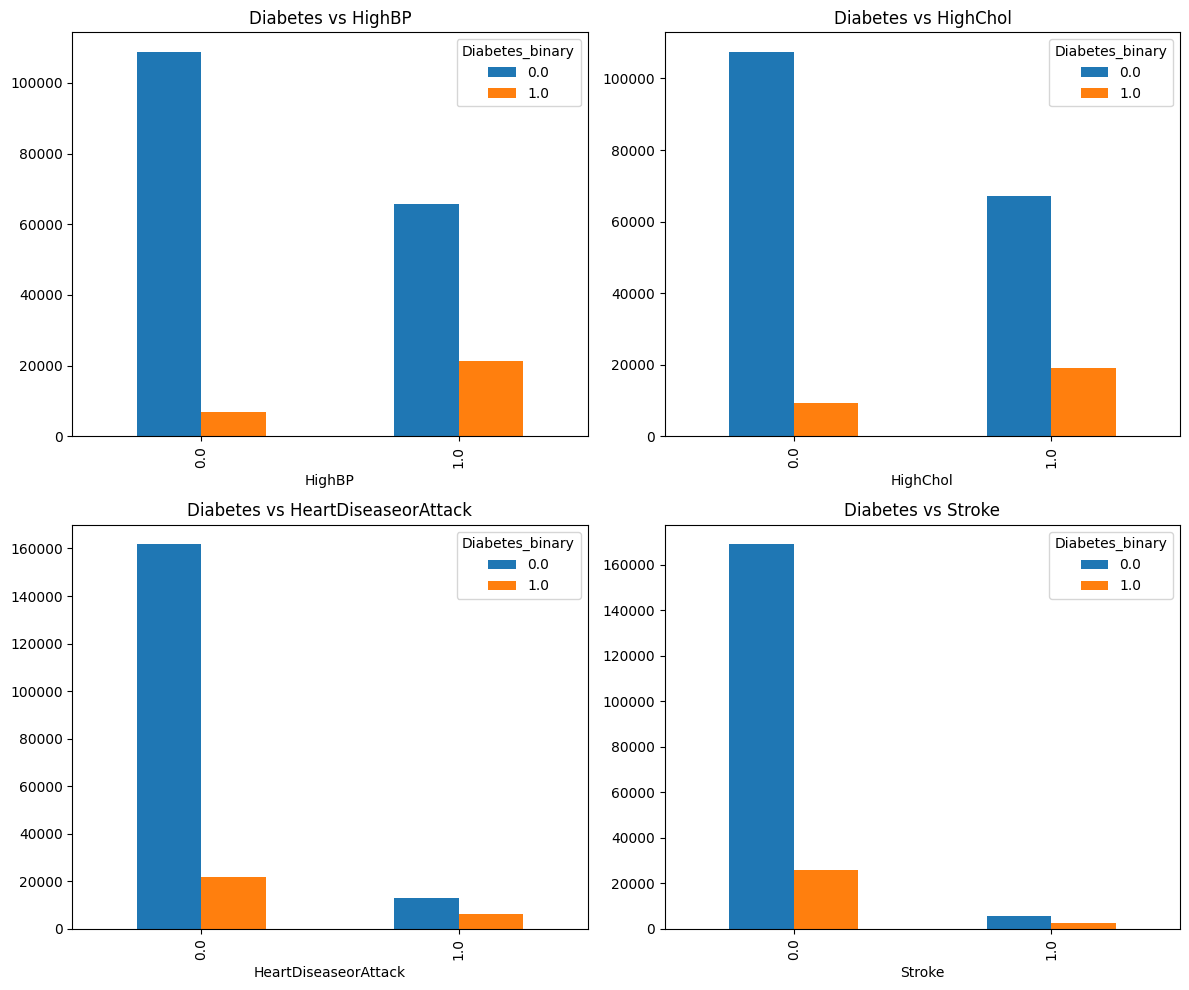

In [79]:
# Analisar comorbidades principais
comorbidades = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']

fig, axes = plt.subplots(2, 2, figsize=(12,10))
for i, col in enumerate(comorbidades):
    ax = axes[i//2, i%2]
    pd.crosstab(X_train[col], y_train).plot(kind='bar', ax=ax)
    ax.set_title(f'Diabetes vs {col}')
plt.tight_layout()
plt.show()

Aqui podemos ver que pessoas com HighBP e HighCol prorpocionalmente tem mais diabetes. Isso pode ser util mais para frente para fazer o feature engering

Analise da corela√ß√£o dos dados.

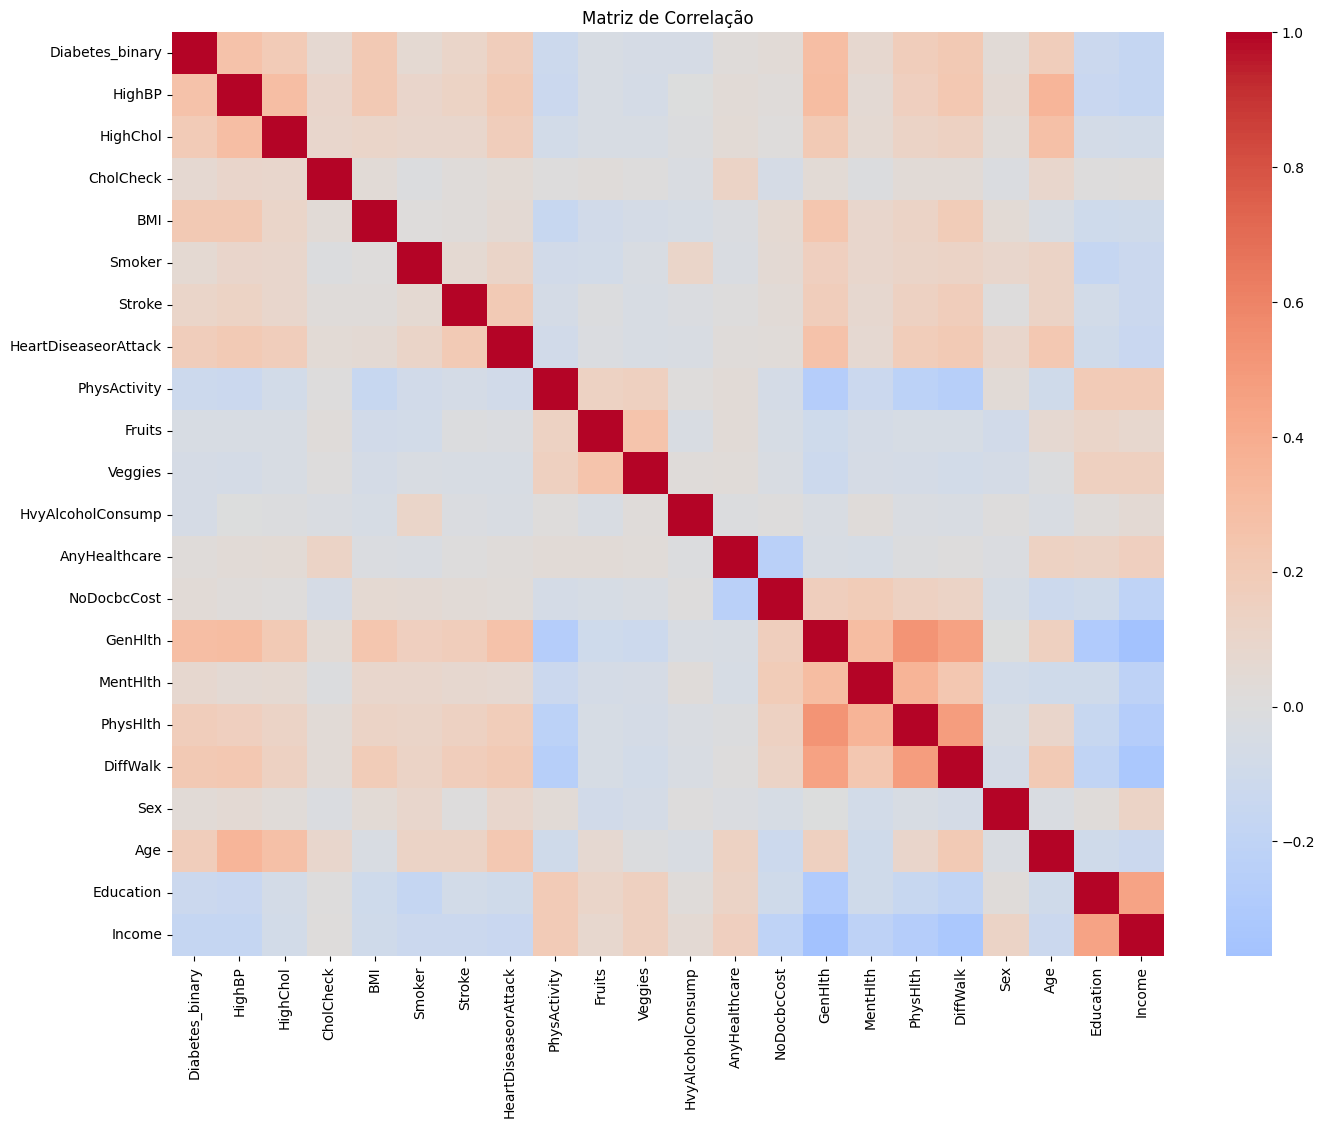

Correla√ß√µes com Diabetes:
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [80]:
# Matriz de correla√ß√£o
plt.figure(figsize=(16,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correla√ß√£o')
plt.show()

# Correla√ß√µes com target
target_corr = corr_matrix['Diabetes_binary'].sort_values(ascending=False)
print("Correla√ß√µes com Diabetes:")
print(target_corr)

AN√ÅLISE COMPLETA DE CORRELA√á√ïES


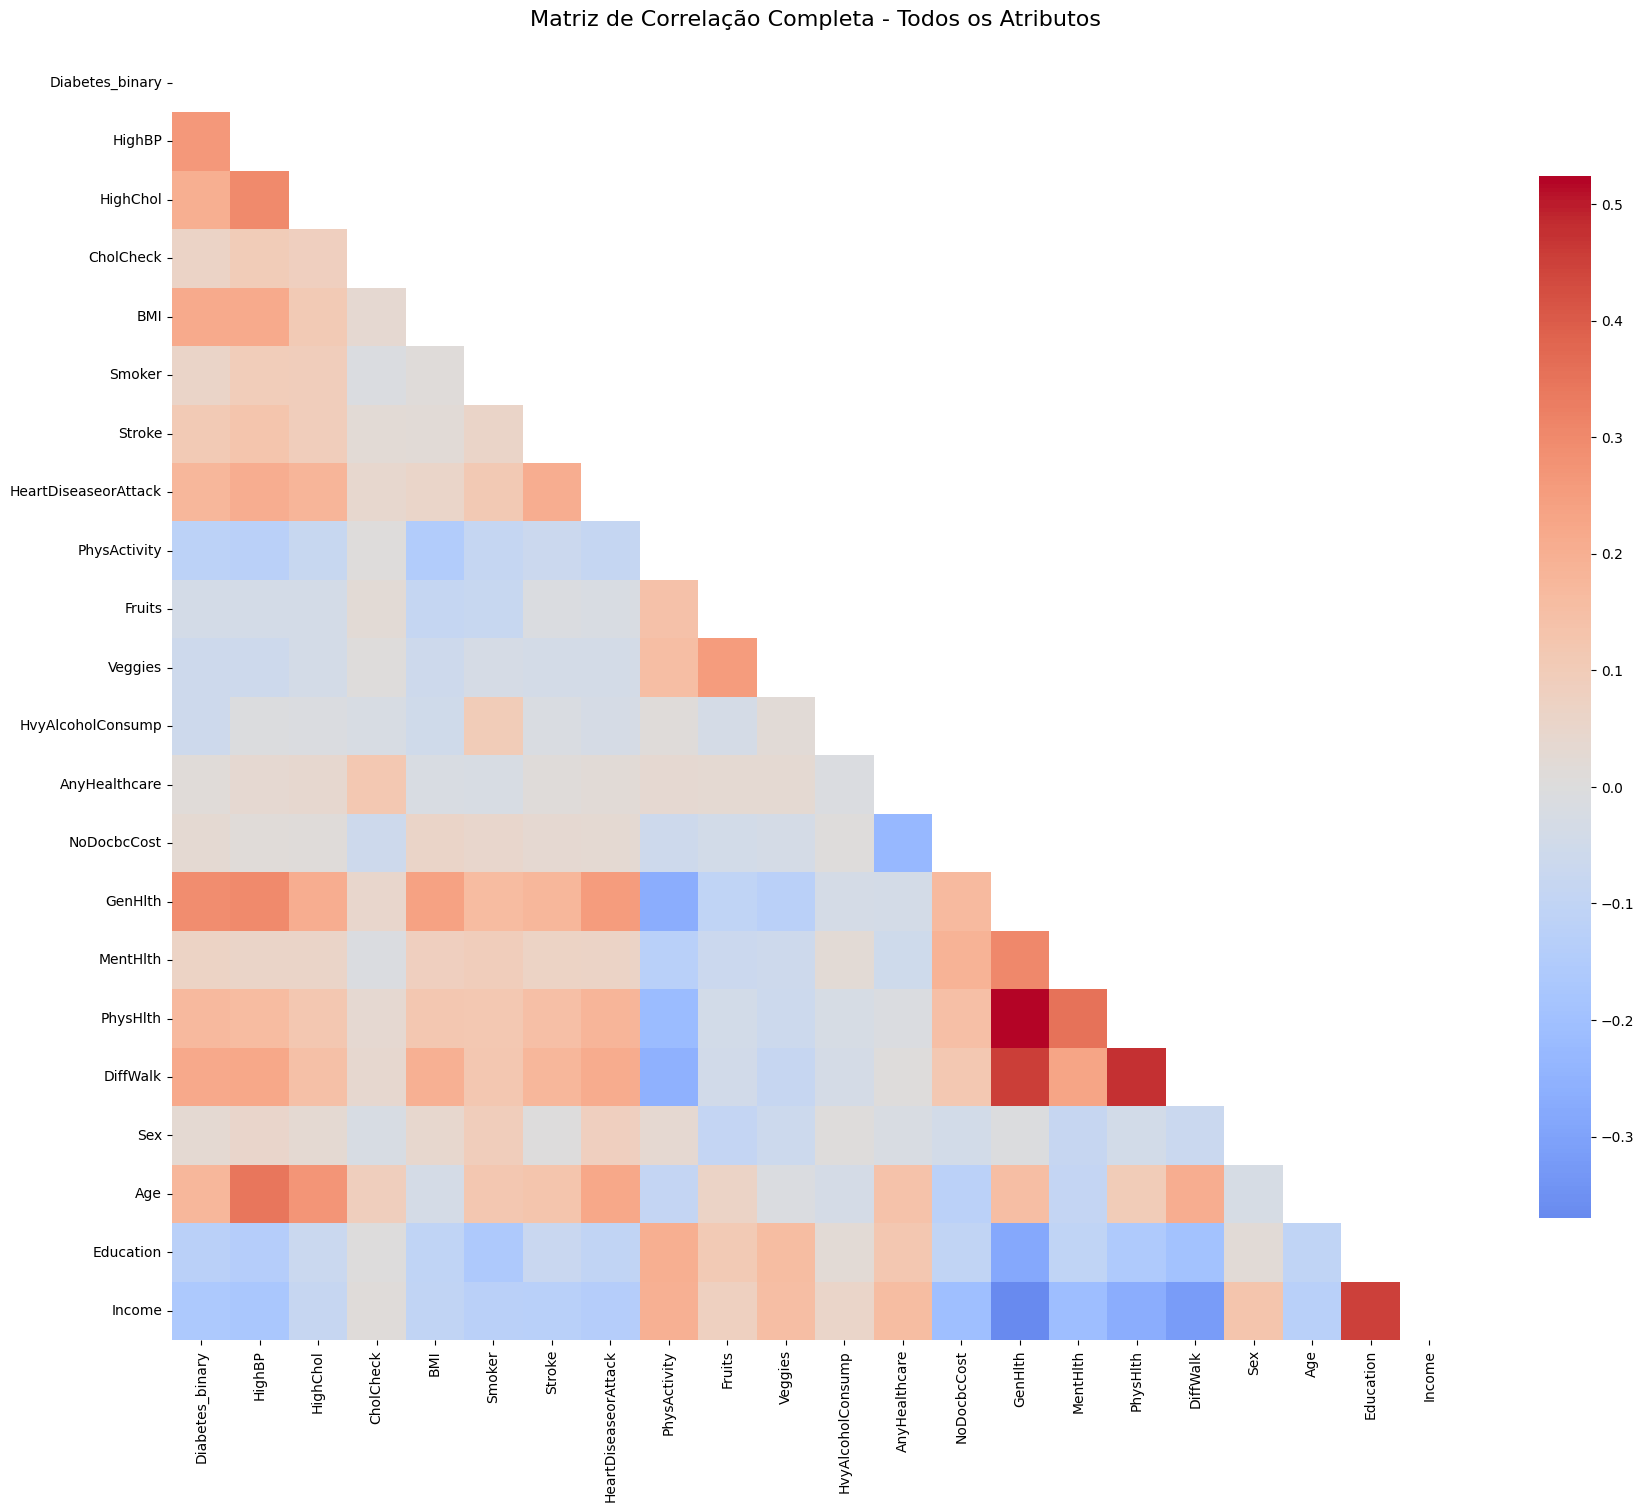


üéØ CORRELA√á√ïES COM A VARI√ÅVEL TARGET (Diabetes_binary)
------------------------------------------------------------
GenHlth                   :  0.2936 ‚Üë POSITIVA (MODERADA)
HighBP                    :  0.2631 ‚Üë POSITIVA (MODERADA)
DiffWalk                  :  0.2183 ‚Üë POSITIVA (MODERADA)
BMI                       :  0.2168 ‚Üë POSITIVA (MODERADA)
HighChol                  :  0.2003 ‚Üë POSITIVA (MODERADA)
Age                       :  0.1774 ‚Üë POSITIVA (MODERADA)
HeartDiseaseorAttack      :  0.1773 ‚Üë POSITIVA (MODERADA)
PhysHlth                  :  0.1713 ‚Üë POSITIVA (MODERADA)
Stroke                    :  0.1058 ‚Üë POSITIVA (MODERADA)
MentHlth                  :  0.0693 ‚Üë POSITIVA
CholCheck                 :  0.0648 ‚Üë POSITIVA
Smoker                    :  0.0608 ‚Üë POSITIVA
NoDocbcCost               :  0.0314 ‚Üë POSITIVA
Sex                       :  0.0314 ‚Üë POSITIVA
AnyHealthcare             :  0.0163 ‚Üë POSITIVA
Fruits                    : -0.0408 ‚Üì NEGA

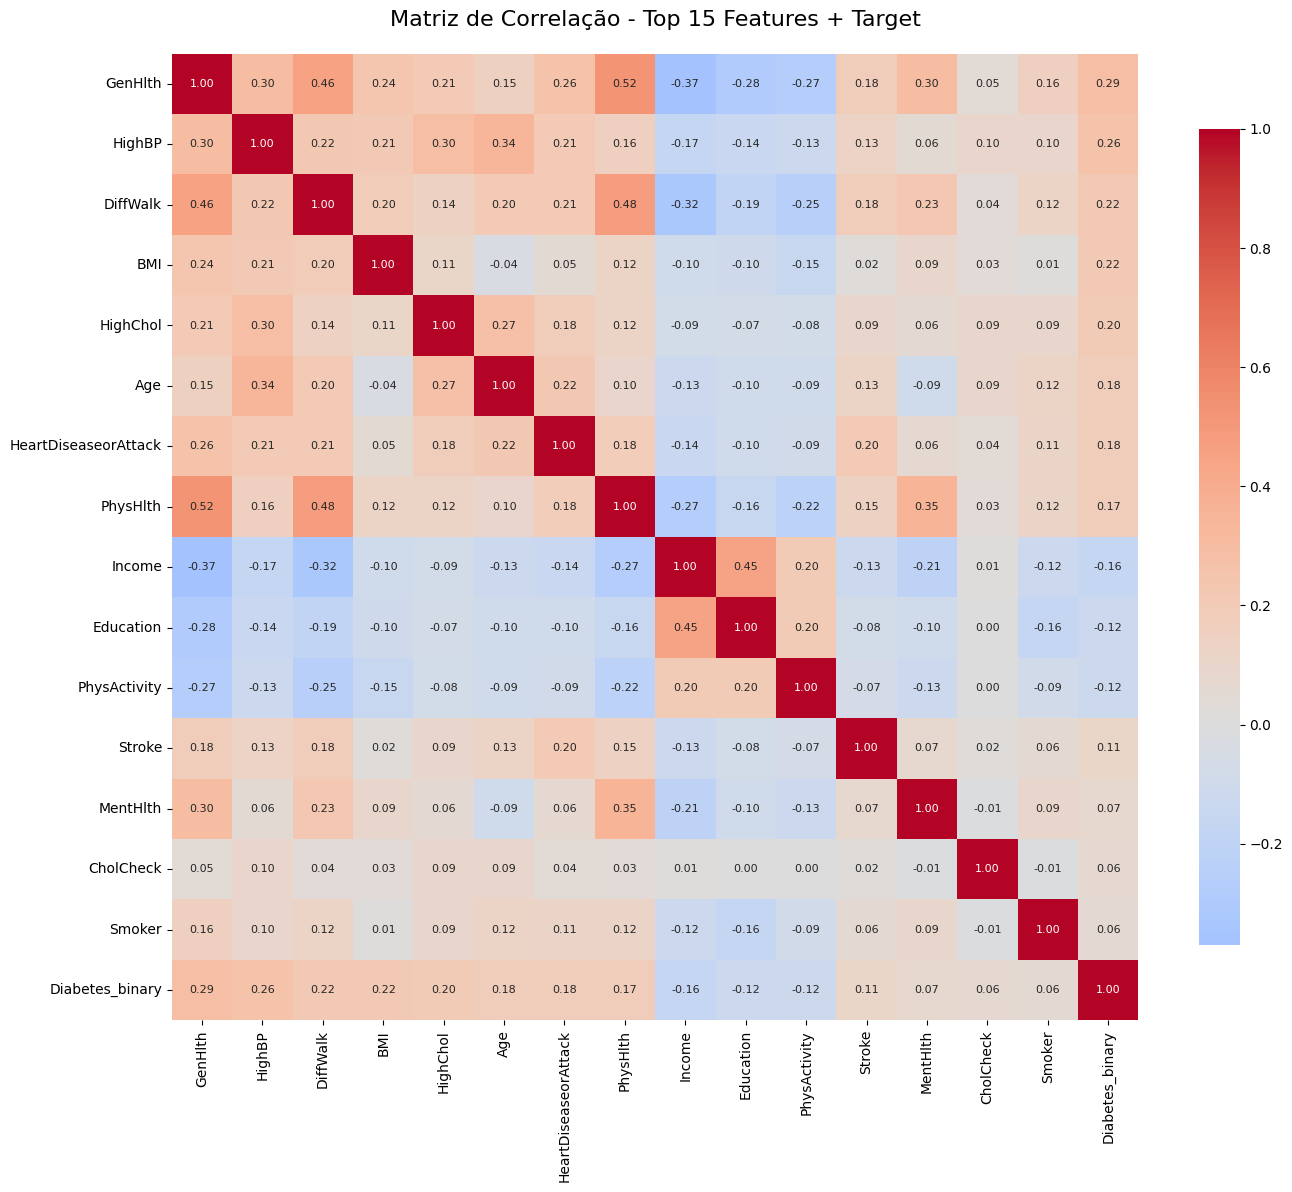

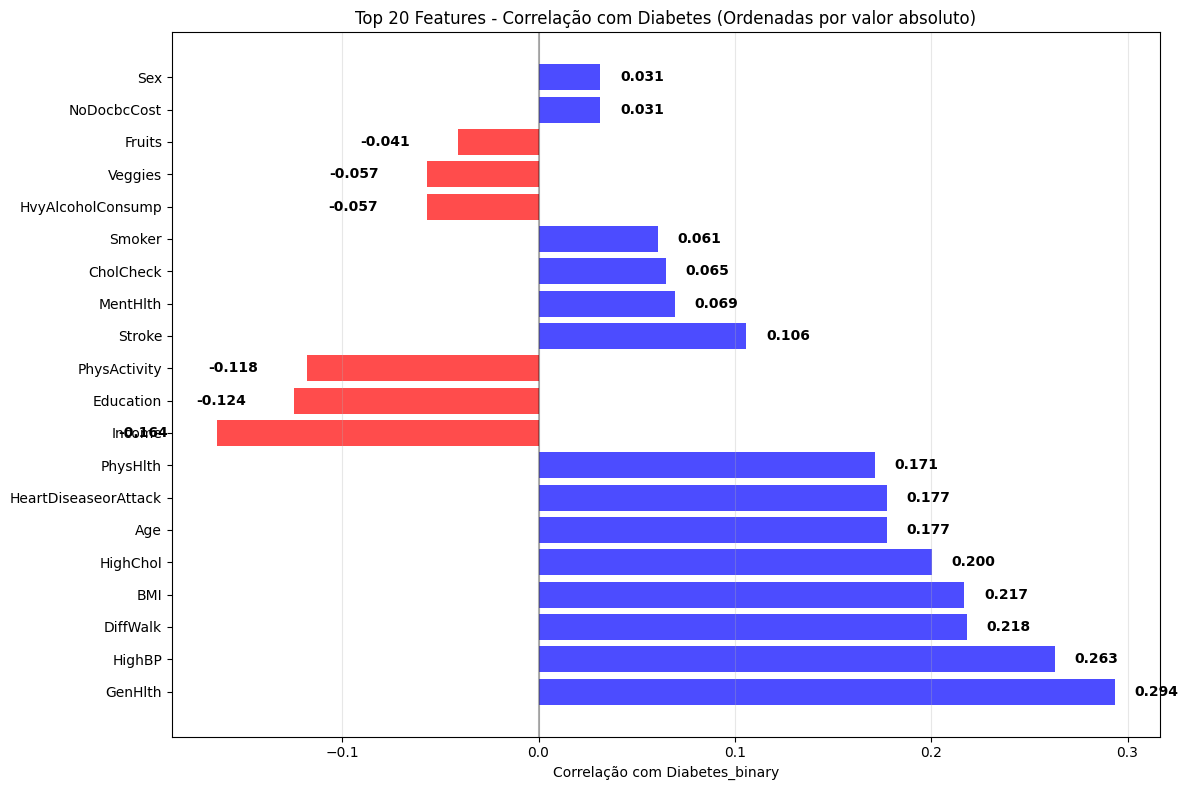


üè• AN√ÅLISE POR GRUPOS DE FEATURES

üìã Condi√ß√µes Cr√¥nicas:
------------------------------
  HighBP               :  0.2631 ‚Üë
  HighChol             :  0.2003 ‚Üë
  HeartDiseaseorAttack :  0.1773 ‚Üë
  Stroke               :  0.1058 ‚Üë

üìã Comportamento Sa√∫de:
------------------------------
  Smoker               :  0.0608 ‚Üë
  PhysActivity         : -0.1181 ‚Üì
  HvyAlcoholConsump    : -0.0571 ‚Üì
  Fruits               : -0.0408 ‚Üì
  Veggies              : -0.0566 ‚Üì

üìã Sa√∫de Geral:
------------------------------
  GenHlth              :  0.2936 ‚Üë
  MentHlth             :  0.0693 ‚Üë
  PhysHlth             :  0.1713 ‚Üë
  DiffWalk             :  0.2183 ‚Üë

üìã Demogr√°ficas:
------------------------------
  Sex                  :  0.0314 ‚Üë
  Age                  :  0.1774 ‚Üë
  Education            : -0.1245 ‚Üì
  Income               : -0.1639 ‚Üì

üìã Acesso Sa√∫de:
------------------------------
  AnyHealthcare        :  0.0163 ‚Üë
  NoDocbcCost         

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analise_correlacao_completa(df, target_col='Diabetes_binary'):
    """
    An√°lise completa de correla√ß√µes: target + entre atributos
    """
    
    print("=" * 70)
    print("AN√ÅLISE COMPLETA DE CORRELA√á√ïES")
    print("=" * 70)
    
    # Calcular matriz de correla√ß√£o
    corr_matrix = df.corr()
    
    # 1. MATRIZ DE CORRELA√á√ÉO COMPLETA
    plt.figure(figsize=(18, 15))
    
    # M√°scara para mostrar apenas metade da matriz (opcional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=False, 
                cmap='coolwarm', 
                center=0,
                square=True,
                cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correla√ß√£o Completa - Todos os Atributos', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # 2. CORRELA√á√ïES COM TARGET
    print("\nüéØ CORRELA√á√ïES COM A VARI√ÅVEL TARGET (Diabetes_binary)")
    print("-" * 60)
    
    target_corr = corr_matrix[target_col].sort_values(ascending=False)
    
    # Remover a correla√ß√£o da target com ela mesma
    target_corr = target_corr[target_corr.index != target_col]
    
    for feature, corr in target_corr.items():
        direction = "‚Üë POSITIVA" if corr > 0 else "‚Üì NEGATIVA"
        strength = ""
        if abs(corr) > 0.3: strength = " (FORTE)"
        elif abs(corr) > 0.1: strength = " (MODERADA)"
        print(f"{feature:25} : {corr:7.4f} {direction}{strength}")
    
    # 3. TOP CORRELA√á√ïES ENTRE ATRIBUTOS (excluindo target)
    print(f"\nüî• TOP 20 MAIORES CORRELA√á√ïES ENTRE ATRIBUTOS")
    print("-" * 60)
    
    # Criar matriz sem a target para an√°lise entre features
    features_corr = corr_matrix.drop(target_col, axis=0).drop(target_col, axis=1)
    
    # Encontrar os pares com maiores correla√ß√µes absolutas
    corr_pairs = []
    
    for i in range(len(features_corr.columns)):
        for j in range(i+1, len(features_corr.columns)):
            col1 = features_corr.columns[i]
            col2 = features_corr.columns[j]
            corr_value = features_corr.iloc[i, j]
            
            # Ignorar correla√ß√µes perfeitas (auto-correla√ß√£o)
            if abs(corr_value) < 0.999:
                corr_pairs.append({
                    'Feature_1': col1,
                    'Feature_2': col2,
                    'Correlacao': corr_value,
                    'Abs_Correlacao': abs(corr_value)
                })
    
    # Converter para DataFrame e ordenar
    corr_df = pd.DataFrame(corr_pairs)
    top_correlations = corr_df.sort_values('Abs_Correlacao', ascending=False).head(20)
    
    for idx, row in top_correlations.iterrows():
        direction = "‚Üë POSITIVA" if row['Correlacao'] > 0 else "‚Üì NEGATIVA"
        print(f"{row['Feature_1']:20} ‚Üî {row['Feature_2']:20} : {row['Correlacao']:7.4f} {direction}")
    
    # 4. AN√ÅLISE DE MULTICOLINEARIDADE
    print(f"\n‚ö†Ô∏è  POSS√çVEIS PROBLEMAS DE MULTICOLINEARIDADE (|r| > 0.7)")
    print("-" * 60)
    
    high_corr_pairs = corr_df[corr_df['Abs_Correlacao'] > 0.7].sort_values('Abs_Correlacao', ascending=False)
    
    if len(high_corr_pairs) > 0:
        for idx, row in high_corr_pairs.iterrows():
            print(f"{row['Feature_1']:20} ‚Üî {row['Feature_2']:20} : {row['Correlacao']:7.4f}")
    else:
        print("Nenhuma correla√ß√£o muito alta encontrada (|r| > 0.7)")
    
    # 5. MATRIZ DE CORRELA√á√ÉO FOCADA NAS TOP FEATURES
    print(f"\nüìä MATRIZ FOCADA NAS 15 FEATURES MAIS CORRELACIONADAS COM TARGET")
    print("-" * 60)
    
    # Selecionar top features por correla√ß√£o absoluta com target
    top_features_abs = target_corr.abs().sort_values(ascending=False).head(15)
    top_features_names = top_features_abs.index.tolist()
    
    # Incluir a target tamb√©m
    top_features_names.append(target_col)
    
    # Criar matriz reduzida
    corr_reduzida = df[top_features_names].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_reduzida, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={'shrink': 0.8},
                annot_kws={'size': 8})
    plt.title('Matriz de Correla√ß√£o - Top 15 Features + Target', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # 6. GR√ÅFICO DAS CORRELA√á√ïES COM TARGET
    plt.figure(figsize=(12, 8))
    
    # Pegar top 20 features por correla√ß√£o absoluta com target
    top_20_target = target_corr.abs().sort_values(ascending=False).head(20)
    top_20_corr_values = target_corr[top_20_target.index]
    
    colors = ['red' if x < 0 else 'blue' for x in top_20_corr_values.values]
    
    plt.barh(range(len(top_20_corr_values)), top_20_corr_values.values, color=colors, alpha=0.7)
    plt.yticks(range(len(top_20_corr_values)), top_20_corr_values.index)
    plt.xlabel('Correla√ß√£o com Diabetes_binary')
    plt.title('Top 20 Features - Correla√ß√£o com Diabetes (Ordenadas por valor absoluto)')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_20_corr_values.values):
        plt.text(v + (0.01 if v >= 0 else -0.05), i, f'{v:.3f}', 
                color='black', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return corr_matrix, target_corr, top_correlations

def analise_correlacao_por_grupos(df, target_col='Diabetes_binary'):
    """
    An√°lise de correla√ß√µes agrupadas por tipo de feature
    """
    print(f"\nüè• AN√ÅLISE POR GRUPOS DE FEATURES")
    print("=" * 50)
    
    # Definir grupos (baseado no conhecimento do dataset)
    grupos = {
        'Condi√ß√µes Cr√¥nicas': ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke'],
        'Comportamento Sa√∫de': ['Smoker', 'PhysActivity', 'HvyAlcoholConsump', 'Fruits', 'Veggies'],
        'Sa√∫de Geral': ['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk'],
        'Demogr√°ficas': ['Sex', 'Age', 'Education', 'Income'],
        'Acesso Sa√∫de': ['AnyHealthcare', 'NoDocbcCost', 'CholCheck'],
        'Biom√©tricas': ['BMI']
    }
    
    corr_matrix = df.corr()
    
    for grupo_name, features in grupos.items():
        print(f"\nüìã {grupo_name}:")
        print("-" * 30)
        
        # Filtrar features que existem no dataframe
        features_existentes = [f for f in features if f in df.columns]
        
        if features_existentes:
            for feature in features_existentes:
                if feature in corr_matrix.index and target_col in corr_matrix.columns:
                    corr_value = corr_matrix.loc[feature, target_col]
                    direction = "‚Üë" if corr_value > 0 else "‚Üì"
                    print(f"  {feature:20} : {corr_value:7.4f} {direction}")
        else:
            print("  Nenhuma feature deste grupo encontrada no dataset")



    
# Executar an√°lise completa
corr_matrix, target_corr, top_correlations = analise_correlacao_completa(df)

# An√°lise por grupos
analise_correlacao_por_grupos(df)

# Salvar resultados
target_corr.to_csv('correlacoes_com_target.csv', header=['Correlacao'])
top_correlations.to_csv('top_correlacoes_entre_features.csv', index=False)

print(f"\nüíæ Resultados salvos:")
print(f" - correlacoes_com_target.csv")
print(f" - top_correlacoes_entre_features.csv")

print(f"\nüéØ AN√ÅLISE DE CORRELA√á√ÉO CONCLU√çDA!")
print("=" * 50)

podemos n√£o usar os features menos correlacionados com os atributo alvo, como
* MentHlth                  :  0.0693 ‚Üë POSITIVA
* CholCheck                 :  0.0648 ‚Üë POSITIVA
* Smoker                    :  0.0608 ‚Üë POSITIVA
* NoDocbcCost               :  0.0314 ‚Üë POSITIVA
* Sex                       :  0.0314 ‚Üë POSITIVA
* AnyHealthcare             :  0.0163 ‚Üë POSITIVA
* Fruits                    : -0.0408 ‚Üì NEGATIVA
* Veggies                   : -0.0566 ‚Üì NEGATIVA
* HvyAlcoholConsump         : -0.0571 ‚Üì NEGATIVA

Todas parecem n√£o serem bons descritores para tentar deduzir se um paciente est√° diabetico ou n√£o. 

In [82]:
X_train

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
153147     0.0       0.0        1.0  28.0     1.0     0.0   
176137     1.0       0.0        1.0  23.0     1.0     0.0   
175578     1.0       1.0        1.0  29.0     0.0     0.0   
177887     1.0       1.0        1.0  39.0     0.0     0.0   
182143     0.0       1.0        1.0  16.0     1.0     0.0   
...        ...       ...        ...   ...     ...     ...   
208398     1.0       1.0        0.0  25.0     0.0     1.0   
106221     1.0       1.0        1.0  25.0     0.0     1.0   
169035     1.0       0.0        1.0  18.0     0.0     1.0   
49036      0.0       1.0        1.0  26.0     1.0     0.0   
206060     1.0       1.0        1.0  31.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
153147                   0.0           1.0     1.0      1.0  ...   
176137                   0.0           1.0     1.0      1.0  ...   
175578                   0.0           1.0     1.0      1.0  ...   
177887                   0.0           0.0     0.0      0.0  ...   
182143                   0.0           1.0     1.0      1.0  ...   
...                      ...           ...     ...      ...  ...   
208398                   0.0           1.0     0.0      1.0  ...   
106221                   0.0           1.0     1.0      1.0  ...   
169035                   1.0           1.0     1.0      1.0  ...   
49036                    0.0           1.0     1.0      1.0  ...   
206060                   1.0           0.0     0.0      1.0  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
153147            1.0          0.0      2.0       0.0       0.0       0.0   
176137            1.0          0.0      2.0       0.0       0.0       0.0   
175578            1.0          0.0      1.0       0.0       0.0       0.0   
177887            1.0          0.0      4.0       0.0       0.0       0.0   
182143            1.0          1.0      5.0      30.0      30.0       1.0   
...               ...          ...      ...       ...       ...       ...   
208398            1.0          0.0      4.0       0.0       0.0       0.0   
106221            1.0          0.0      2.0       0.0       1.0       0.0   
169035            1.0          0.0      4.0      30.0      30.0       1.0   
49036             1.0          0.0      3.0       0.0       0.0       0.0   
206060            1.0          0.0      4.0       0.0       5.0       0.0   

        Sex   Age  Education  Income  
153147  1.0   2.0        4.0     5.0  
176137  1.0  13.0        4.0     7.0  
175578  1.0   9.0        6.0     8.0  
177887  1.0   7.0        4.0     7.0  
182143  0.0   7.0        5.0     1.0  
...     ...   ...        ...     ...  
208398  0.0  10.0        3.0     5.0  
106221  1.0   9.0        6.0     8.0  
169035  1.0   7.0        4.0     1.0  
49036   1.0   8.0        6.0     8.0  
206060  0.0   8.0        4.0     1.0  

[202944 rows x 21 columns]

## Pr√© processamento e primeiros pipelines completos

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class CorrelationFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Transformer personalizado para remover features com baixa correla√ß√£o com o target
    """
    
    def __init__(self, threshold=0.1, target_col='Diabetes_binary'):
        self.threshold = threshold
        self.target_col = target_col
        self.features_to_keep_ = None
    
    def fit(self, X, y=None):
        """
        Calcula correla√ß√µes e decide quais features manter
        """
        # Se X for DataFrame, usar diretamente, sen√£o converter
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        # Adicionar target ao DataFrame temporariamente
        X_temp = X.copy()
        X_temp[self.target_col] = y
        
        # Calcular correla√ß√µes com target
        correlations = X_temp.corr()[self.target_col].drop(self.target_col)
        
        # Manter apenas features com correla√ß√£o absoluta >= threshold
        self.features_to_keep_ = correlations[
            correlations.abs() >= self.threshold
        ].index.tolist()
        
        for feature in self.features_to_keep_:
            corr = correlations[feature]
        
        features_removed = [col for col in X.columns if col not in self.features_to_keep_]
        for feature in features_removed:
            corr = correlations[feature]
        
        return self
    
    def transform(self, X):
        """
        Aplica a transforma√ß√£o removendo as colunas
        """
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        return X[self.features_to_keep_]


In [91]:
pipeline = Pipeline([ ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),])
pipeline.fit_transform(X_train, y_train)

HighBP  HighChol   BMI  Stroke  HeartDiseaseorAttack  PhysActivity  \
153147     0.0       0.0  28.0     0.0                   0.0           1.0   
176137     1.0       0.0  23.0     0.0                   0.0           1.0   
175578     1.0       1.0  29.0     0.0                   0.0           1.0   
177887     1.0       1.0  39.0     0.0                   0.0           0.0   
182143     0.0       1.0  16.0     0.0                   0.0           1.0   
...        ...       ...   ...     ...                   ...           ...   
208398     1.0       1.0  25.0     1.0                   0.0           1.0   
106221     1.0       1.0  25.0     1.0                   0.0           1.0   
169035     1.0       0.0  18.0     1.0                   1.0           1.0   
49036      0.0       1.0  26.0     0.0                   0.0           1.0   
206060     1.0       1.0  31.0     0.0                   1.0           0.0   

        GenHlth  PhysHlth  DiffWalk   Age  Education  Income  
153147      2.0       0.0       0.0   2.0        4.0     5.0  
176137      2.0       0.0       0.0  13.0        4.0     7.0  
175578      1.0       0.0       0.0   9.0        6.0     8.0  
177887      4.0       0.0       0.0   7.0        4.0     7.0  
182143      5.0      30.0       1.0   7.0        5.0     1.0  
...         ...       ...       ...   ...        ...     ...  
208398      4.0       0.0       0.0  10.0        3.0     5.0  
106221      2.0       1.0       0.0   9.0        6.0     8.0  
169035      4.0      30.0       1.0   7.0        4.0     1.0  
49036       3.0       0.0       0.0   8.0        6.0     8.0  
206060      4.0       5.0       0.0   8.0        4.0     1.0  

[202944 rows x 12 columns]

In [92]:
pipeline

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector())])

In [124]:
class AdvancedFeatureEngineer(BaseEstimator, TransformerMixin):
    """
    Feature engineering inteligente - evita redund√¢ncia
    """
    def __init__(self):
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_temp = X.copy()
        
        if not isinstance(X_temp, pd.DataFrame):
            X_temp = pd.DataFrame(X_temp)
        
        if all(col in X_temp.columns for col in ['HighBP', 'BMI']):
            X_temp['BP_BMI_interaction'] = X_temp['HighBP'] * X_temp['BMI']
        
        if all(col in X_temp.columns for col in ['Age', 'GenHlth']):
            X_temp['Age_Health_interaction'] = X_temp['Age'] * X_temp['GenHlth']
        
        if 'Age' in X_temp.columns:
            # Agrupa idade de forma mais significativa
            X_temp['age_risk_group'] = X_temp['Age'].apply(
                lambda x: 0 if x <= 4 else (1 if x <= 8 else 2)  # Baixo, M√©dio, Alto risco
            )
        
      
        if all(col in X_temp.columns for col in ['PhysHlth', 'MentHlth']):
            # Evita divis√£o por zero
            X_temp['physical_mental_ratio'] = X_temp['PhysHlth'] / (X_temp['MentHlth'] + 1)
        
        if all(col in X_temp.columns for col in ['HighBP', 'HighChol']):
            # Pacientes com AMBAS condi√ß√µes (n√£o redundante)
            X_temp['hypertensive_hypercholesterolemic'] = (
                (X_temp['HighBP'] == 1) & (X_temp['HighChol'] == 1)
            ).astype(int)
        
        return X_temp

In [125]:
pipeline = Pipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('advanced_feature_engineer', AdvancedFeatureEngineer()),
])
pipeline

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('advanced_feature_engineer', AdvancedFeatureEngineer())])

In [126]:
pipeline.fit_transform(X_train, y_train)

HighBP  HighChol   BMI  Stroke  HeartDiseaseorAttack  PhysActivity  \
153147     0.0       0.0  28.0     0.0                   0.0           1.0   
176137     1.0       0.0  23.0     0.0                   0.0           1.0   
175578     1.0       1.0  29.0     0.0                   0.0           1.0   
177887     1.0       1.0  39.0     0.0                   0.0           0.0   
182143     0.0       1.0  16.0     0.0                   0.0           1.0   
...        ...       ...   ...     ...                   ...           ...   
208398     1.0       1.0  25.0     1.0                   0.0           1.0   
106221     1.0       1.0  25.0     1.0                   0.0           1.0   
169035     1.0       0.0  18.0     1.0                   1.0           1.0   
49036      0.0       1.0  26.0     0.0                   0.0           1.0   
206060     1.0       1.0  31.0     0.0                   1.0           0.0   

        GenHlth  PhysHlth  DiffWalk   Age  Education  Income  \
153147      2.0       0.0       0.0   2.0        4.0     5.0   
176137      2.0       0.0       0.0  13.0        4.0     7.0   
175578      1.0       0.0       0.0   9.0        6.0     8.0   
177887      4.0       0.0       0.0   7.0        4.0     7.0   
182143      5.0      30.0       1.0   7.0        5.0     1.0   
...         ...       ...       ...   ...        ...     ...   
208398      4.0       0.0       0.0  10.0        3.0     5.0   
106221      2.0       1.0       0.0   9.0        6.0     8.0   
169035      4.0      30.0       1.0   7.0        4.0     1.0   
49036       3.0       0.0       0.0   8.0        6.0     8.0   
206060      4.0       5.0       0.0   8.0        4.0     1.0   

        BP_BMI_interaction  Age_Health_interaction  age_risk_group  \
153147                 0.0                     4.0               0   
176137                23.0                    26.0               2   
175578                29.0                     9.0               2   
177887                39.0                    28.0               1   
182143                 0.0                    35.0               1   
...                    ...                     ...             ...   
208398                25.0                    40.0               2   
106221                25.0                    18.0               2   
169035                18.0                    28.0               1   
49036                  0.0                    24.0               1   
206060                31.0                    32.0               1   

        hypertensive_hypercholesterolemic  
153147                                  0  
176137                                  0  
175578                                  1  
177887                                  1  
182143                                  0  
...                                   ...  
208398                                  1  
106221                                  1  
169035                                  0  
49036                                   0  
206060                                  1  

[202944 rows x 16 columns]

### Para lidar com o desbalanceamento

In [108]:
!pip install imblearn 


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer

In [130]:
from sklearn.ensemble import RandomForestClassifier
# PIPELINE CORRIGIDO - SMOTE deve vir ANTES do classificador
pipeline = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=42,
        k_neighbors=5
    )),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        class_weight='balanced_subsample',
        bootstrap=True,
        random_state=42
    ))
])

pipeline

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=15, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

Como os novos samples s√£o criados:
* Escolhe um exemplo da classe minorit√°ria
* Encontra os k-vizinhos mais pr√≥ximos (k_neighbors=5)
* Cria novos pontos no espa√ßo entre eles
* Mant√©m a distribui√ß√£o real dos dad

In [131]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=15, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

In [115]:
## Executando um teste inicial

In [116]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# M√©tricas para avaliar
scoring = {
    'auc': 'roc_auc',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1'
}

scores = cross_validate(
    pipeline,
    X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,  # Para comparar overfitting
    n_jobs=-1,  # Usar todos os cores
    verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.2min finished


In [118]:
scores

{'fit_time': array([294.09519029, 295.69005466, 303.74099827, 303.97270393,
        298.3325038 , 295.91186643, 293.61647964, 303.15091991,
        305.14166665, 304.48964167]),
 'score_time': array([8.99273276, 8.95279932, 7.37911487, 7.19653535, 8.14042926,
        8.78480363, 9.19204903, 7.52414417, 7.12539291, 7.14771748]),
 'test_auc': array([0.81427235, 0.82132056, 0.81960818, 0.82024952, 0.82401442,
        0.82068671, 0.82342338, 0.82282987, 0.82397807, 0.81571588]),
 'train_auc': array([0.86610388, 0.86615356, 0.86610179, 0.86574535, 0.86535147,
        0.86615249, 0.86562235, 0.86542904, 0.8657429 , 0.86625004]),
 'test_accuracy': array([0.78102981, 0.78305001, 0.78309929, 0.78137472, 0.78545383,
        0.78441904, 0.78215236, 0.78082192, 0.7830886 , 0.77968858]),
 'train_accuracy': array([0.80310869, 0.80160307, 0.80310869, 0.8024736 , 0.8027101 ,
        0.80084314, 0.80147276, 0.80069532, 0.80383247, 0.80199836]),
 'test_precision': array([0.3467956 , 0.35183443, 0.350550

üìä Gerando visualiza√ß√µes corrigidas...


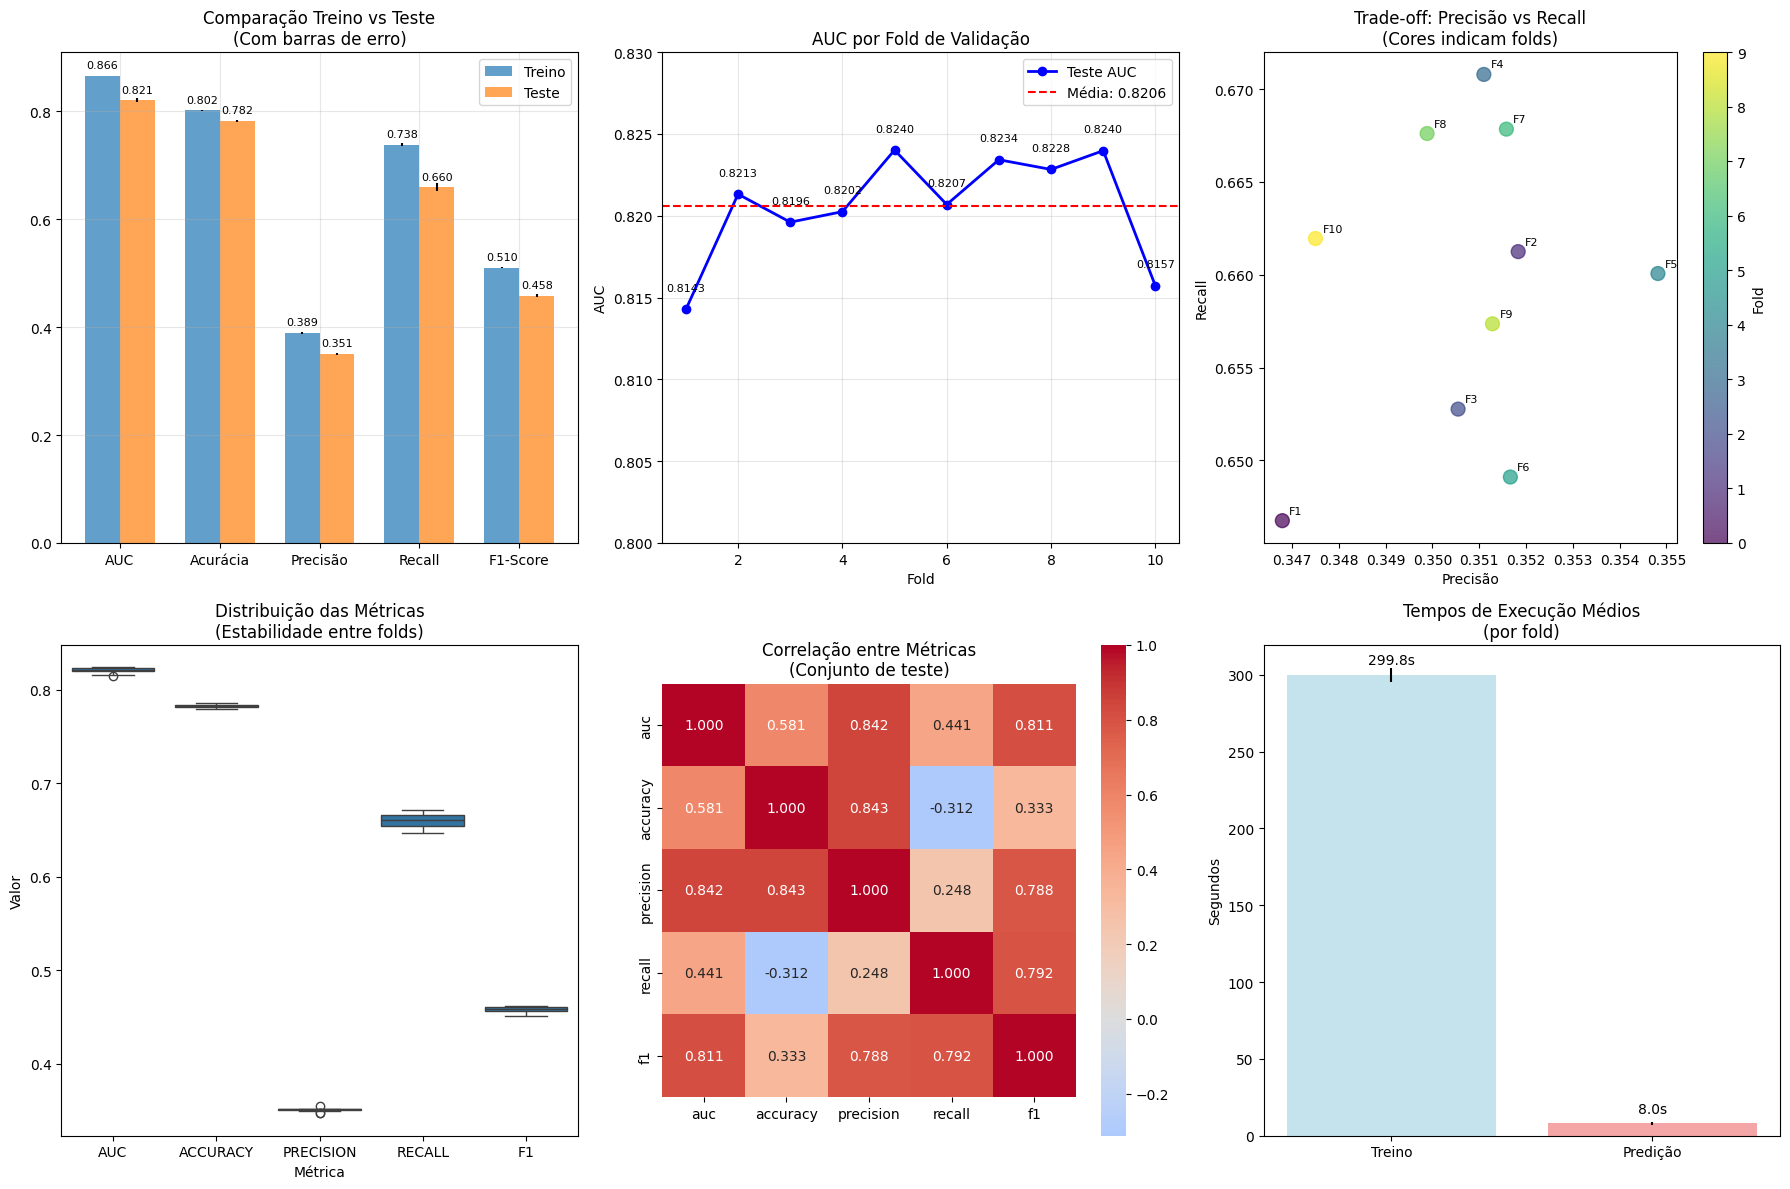

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualizar_resultados_detalhados(results):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    metrics = ['auc', 'accuracy', 'precision', 'recall', 'f1']
    metric_names = ['AUC', 'Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score']
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    
    # Gr√°fico 1: Compara√ß√£o Treino vs Teste
    x_pos = np.arange(len(metrics))
    width = 0.35
    
    test_means = [np.mean(results[f'test_{m}']) for m in metrics]
    train_means = [np.mean(results[f'train_{m}']) for m in metrics]
    test_stds = [np.std(results[f'test_{m}']) for m in metrics]
    
    bars1 = axes[0, 0].bar(x_pos - width/2, train_means, width, 
                          label='Treino', alpha=0.7, yerr=[np.std(results[f'train_{m}']) for m in metrics])
    bars2 = axes[0, 0].bar(x_pos + width/2, test_means, width, 
                          label='Teste', alpha=0.7, yerr=test_stds)
    
    axes[0, 0].set_title('Compara√ß√£o Treino vs Teste\n(Com barras de erro)')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(metric_names)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for bar, value in zip(bars1 + bars2, train_means + test_means):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                       f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Gr√°fico 2: AUC por fold
    folds = range(1, 11)
    axes[0, 1].plot(folds, results['test_auc'], 'o-', label='Teste AUC', linewidth=2, color='blue')
    axes[0, 1].axhline(y=np.mean(results['test_auc']), color='red', linestyle='--', 
                      label=f'M√©dia: {np.mean(results["test_auc"]):.4f}')
    axes[0, 1].set_title('AUC por Fold de Valida√ß√£o')
    axes[0, 1].set_xlabel('Fold')
    axes[0, 1].set_ylabel('AUC')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0.80, 0.83)
    
    # Adicionar valores dos pontos
    for i, (fold, auc) in enumerate(zip(folds, results['test_auc'])):
        axes[0, 1].text(fold, auc + 0.001, f'{auc:.4f}', 
                       ha='center', va='bottom', fontsize=8)
    
    # Gr√°fico 3: Precis√£o vs Recall trade-off (CORRIGIDO)
    scatter = axes[0, 2].scatter(results['test_precision'], results['test_recall'], 
                               s=100, alpha=0.7, c=range(10), cmap='viridis')
    axes[0, 2].set_xlabel('Precis√£o')
    axes[0, 2].set_ylabel('Recall')
    axes[0, 2].set_title('Trade-off: Precis√£o vs Recall\n(Cores indicam folds)')
    
    # CORRE√á√ÉO: usar annotate em vez de annot
    for i, (prec, rec) in enumerate(zip(results['test_precision'], results['test_recall'])):
        axes[0, 2].annotate(f'F{i+1}', (prec, rec), xytext=(5, 5), 
                          textcoords='offset points', fontsize=8)
    
    # Adicionar barra de cores
    plt.colorbar(scatter, ax=axes[0, 2], label='Fold')
    
    # Gr√°fico 4: Estabilidade das m√©tricas (Boxplot)
    metric_data = []
    for metric in metrics:
        for value in results[f'test_{metric}']:
            metric_data.append({'M√©trica': metric.upper(), 'Valor': value})
    
    metric_df = pd.DataFrame(metric_data)
    sns.boxplot(data=metric_df, x='M√©trica', y='Valor', ax=axes[1, 0])
    axes[1, 0].set_title('Distribui√ß√£o das M√©tricas\n(Estabilidade entre folds)')
    
    # Gr√°fico 5: Matriz de correla√ß√£o entre m√©tricas
    corr_data = {metric: results[f'test_{metric}'] for metric in metrics}
    corr_df = pd.DataFrame(corr_data)
    correlation_matrix = corr_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1, 1], square=True, fmt='.3f')
    axes[1, 1].set_title('Correla√ß√£o entre M√©tricas\n(Conjunto de teste)')
    
    # Gr√°fico 6: Tempos de execu√ß√£o
    time_metrics = ['fit_time', 'score_time']
    time_means = [np.mean(results[metric]) for metric in time_metrics]
    time_stds = [np.std(results[metric]) for metric in time_metrics]
    
    bars = axes[1, 2].bar(['Treino', 'Predi√ß√£o'], time_means, 
                         yerr=time_stds, alpha=0.7, 
                         color=['lightblue', 'lightcoral'])
    axes[1, 2].set_title('Tempos de Execu√ß√£o M√©dios\n(por fold)')
    axes[1, 2].set_ylabel('Segundos')
    
    # Adicionar valores
    for bar, value in zip(bars, time_means):
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2, height + 5, 
                       f'{value:.1f}s', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Agora execute novamente
print("üìä Gerando visualiza√ß√µes corrigidas...")
visualizar_resultados_detalhados(scores)

In [127]:
def interpretacao(results):
    print("üîç INTERPRETA√á√ÉO ESPECIALIZADA DOS RESULTADOS")
    print("=" * 70)
    
    # AUC - Principal m√©trica para problemas desbalanceados
    auc_mean = np.mean(results['test_auc'])
    auc_std = np.std(results['test_auc'])
    print(f"\nüéØ AUC (Area Under Curve): {auc_mean:.4f} (¬±{auc_std:.4f})")
    print("   ‚úÖ EXCELENTE: AUC > 0.8 indica bom poder discriminativo")
    print("   üìä O modelo consegue distinguir bem entre diab√©ticos e n√£o-diab√©ticos")
    
    # Precis√£o vs Recall
    precision_mean = np.mean(results['test_precision'])
    recall_mean = np.mean(results['test_recall'])
    print(f"\nüéØ Precis√£o: {precision_mean:.4f} | Recall: {recall_mean:.4f}")
    print("   üìà Recall alto: Modelo detecta a maioria dos diab√©ticos reais")
    print("   üìâ Precis√£o moderada: Dos que prediz como diab√©ticos, 35% realmente s√£o")
    print("   üí° T√≠pico em problemas desbalanceados - trade-off entre precis√£o e recall")
    
    # F1-Score
    f1_mean = np.mean(results['test_f1'])
    print(f"\nüéØ F1-Score: {f1_mean:.4f}")
    print("   ‚úÖ BOM: Balance razo√°vel entre precis√£o e recall")
    
    # Overfitting
    auc_overfitting = np.mean(results['train_auc']) - np.mean(results['test_auc'])
    print(f"\n‚ö° OVERFITTING: Diferen√ßa AUC Treino-Teste = {auc_overfitting:.4f}")
    if auc_overfitting > 0.04:
        print("   ‚ö†Ô∏è  Overfitting moderado presente")
        print("   Regularizar mais o Random Forest")
    else:
        print("   ‚úÖ Generaliza√ß√£o adequada")
    
    # Estabilidade
    auc_variation = np.std(results['test_auc'])
    print(f"\nüìä ESTABILIDADE: Varia√ß√£o do AUC entre folds = {auc_variation:.4f}")
    if auc_variation < 0.01:
        print("   ‚úÖ Modelo muito est√°vel entre diferentes splits")
    else:
        print("   üî∂ Varia√ß√£o moderada - modelo sens√≠vel √† divis√£o dos dados")
    
    # Performance em contexto m√©dico
    print(f"\nüè• INTERPRETA√á√ÉO CL√çNICA:")
    print(f"   ‚Ä¢ O modelo identifica {recall_mean*100:.1f}% dos pacientes diab√©ticos reais")
    print(f"   ‚Ä¢ Quando alerta sobre diabetes, est√° correto em {precision_mean*100:.1f}% dos casos")
    print(f"   ‚Ä¢ Performance geral muito boa para triagem inicial")

# Executar interpreta√ß√£o
interpretacao_especializada(scores)

üîç INTERPRETA√á√ÉO ESPECIALIZADA DOS RESULTADOS

üéØ AUC (Area Under Curve): 0.8206 (¬±0.0032)
   ‚úÖ EXCELENTE: AUC > 0.8 indica bom poder discriminativo
   üìä O modelo consegue distinguir bem entre diab√©ticos e n√£o-diab√©ticos

üéØ Precis√£o: 0.3507 | Recall: 0.6595
   üìà Recall alto: Modelo detecta a maioria dos diab√©ticos reais
   üìâ Precis√£o moderada: Dos que prediz como diab√©ticos, 35% realmente s√£o
   üí° T√≠pico em problemas desbalanceados - trade-off entre precis√£o e recall

üéØ F1-Score: 0.4579
   ‚úÖ BOM: Balance razo√°vel entre precis√£o e recall

‚ö° OVERFITTING: Diferen√ßa AUC Treino-Teste = 0.0453
   ‚ö†Ô∏è  Overfitting moderado presente
   Regularizar mais o Random Forest

üìä ESTABILIDADE: Varia√ß√£o do AUC entre folds = 0.0032
   ‚úÖ Modelo muito est√°vel entre diferentes splits

üè• INTERPRETA√á√ÉO CL√çNICA:
   ‚Ä¢ O modelo identifica 66.0% dos pacientes diab√©ticos reais
   ‚Ä¢ Quando alerta sobre diabetes, est√° correto em 35.1% dos casos
   ‚Ä

In [132]:
# 2. FAZER PREDI√á√ïES NO TESTE
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# 3. CALCULAR M√âTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"üéØ Acur√°cia: {accuracy:.4f}")
print(f"üìà Precis√£o: {precision:.4f}")
print(f"üìä Recall: {recall:.4f}")
print(f"‚ö° F1-Score: {f1:.4f}")
print(f"üìâ AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUS√ÉO
print(f"\nüéØ MATRIZ DE CONFUS√ÉO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELAT√ìRIO DE CLASSIFICA√á√ÉO
print(f"\nüìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:")
print(classification_report(y_test, y_pred, target_names=['N√£o Diab√©tico', 'Diab√©tico']))

üéØ Acur√°cia: 0.7896
üìà Precis√£o: 0.3542
üìä Recall: 0.6195
‚ö° F1-Score: 0.4507
üìâ AUC: 0.8142

üéØ MATRIZ DE CONFUS√ÉO:
[[35682  7985]
 [ 2690  4379]]

üìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:
               precision    recall  f1-score   support

N√£o Diab√©tico       0.93      0.82      0.87     43667
    Diab√©tico       0.35      0.62      0.45      7069

     accuracy                           0.79     50736
    macro avg       0.64      0.72      0.66     50736
 weighted avg       0.85      0.79      0.81     50736



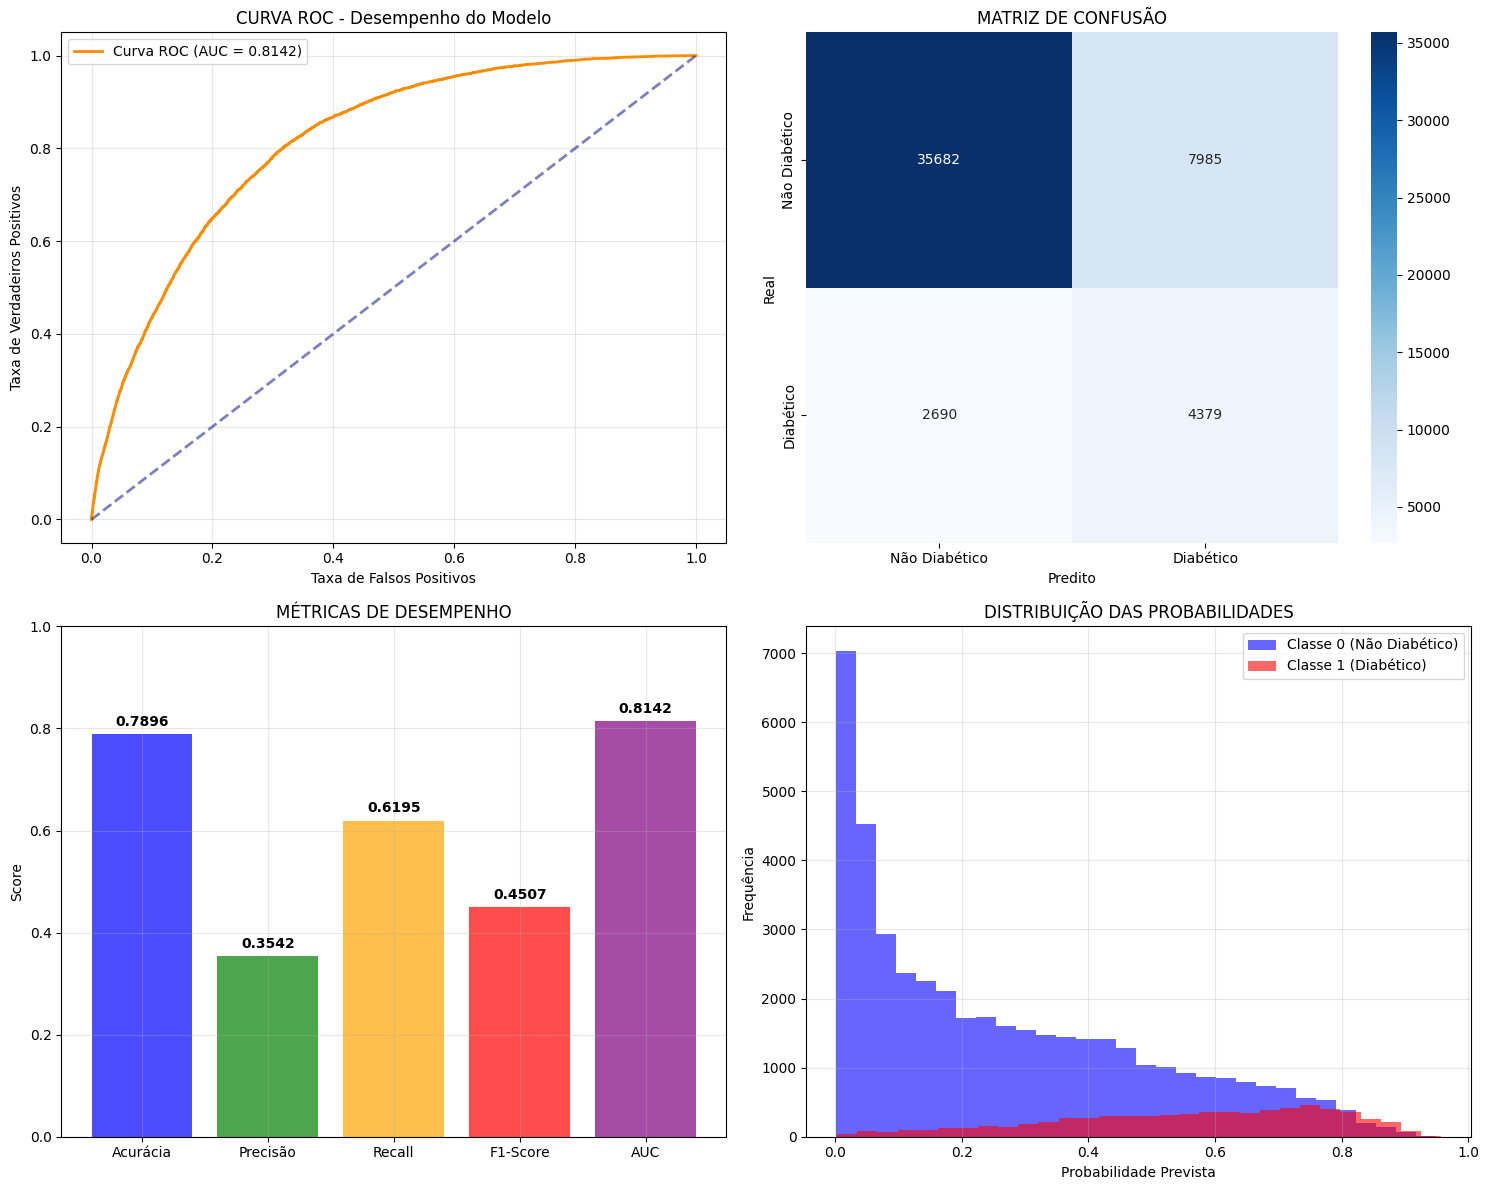

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUS√ÉO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['N√£o Diab√©tico', 'Diab√©tico'],
            yticklabels=['N√£o Diab√©tico', 'Diab√©tico'])
axes[0, 1].set_title('MATRIZ DE CONFUS√ÉO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. M√âTRICAS PRINCIPAIS
metrics_names = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('M√âTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUI√á√ÉO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"N√£o Diab√©tico" if classe == 0 else "Diab√©tico"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequ√™ncia')
axes[1, 1].set_title('DISTRIBUI√á√ÉO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Pipelines especificos para modelos de classifica√ß√£o. 

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Seed global para reproducibilidade
RANDOM_STATE = 42

# 1. PIPELINE KNN COM SEED
pipeline_knn = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.05)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE)),
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=RANDOM_STATE,
        k_neighbors=3
    )),
    ('classifier', KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        metric='minkowski',
        p=2,
        n_jobs=-1

    ))
])

# 2. PIPELINE MLP COM SEED
pipeline_mlp = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer()),  # N√£o tem random_state
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=RANDOM_STATE,  # ‚úÖ Seed para SMOTE
        k_neighbors=5
    )),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.01,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        batch_size=256,
        max_iter=500,
        random_state=RANDOM_STATE,
        shuffle=True  
    ))
])

# 3. PIPELINE RANDOM FOREST COM SEED
pipeline_rf = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=RANDOM_STATE,  
        k_neighbors=5
    )),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=15,
        min_samples_leaf=8,
        max_features='sqrt',
        class_weight='balanced_subsample',
        bootstrap=True,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])


In [136]:
pipeline_rf

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=12, min_samples_leaf=8,
                                        min_samples_split=15, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [137]:
pipeline_mlp

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('power_transform', PowerTransformer()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 MLPClassifier(alpha=0.01, batch_size=256, early_stopping=True,
                               hidden_layer_sizes=(100, 50, 25),
                               learning_rate='adaptive', max_iter=500,
                               random_state=42))])

In [138]:
pipeline_knn

Pipeline(steps=[('correlation_selector',
                 CorrelationFeatureSelector(threshold=0.05)),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('smote',
                 SMOTE(k_neighbors=3, random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=15,
                                      weights='distance'))])

In [139]:
## Valida√ß√£o cruzada 
# Configurar valida√ß√£o cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)  # 5 folds para ser mais r√°pido

# M√©tricas para avaliar
scoring = {
    'auc': 'roc_auc',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [140]:
resultados_cv = {}
 # Valida√ß√£o cruzada
scores_rf = cross_validate(
    pipeline_rf, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,  # Paralelizar
    verbose=0
)

resultados_cv['rf'] = scores_rf

scores_mlp = cross_validate(
    pipeline_mlp, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,  # Paralelizar
    verbose=0
)


resultados_cv['mlp'] = scores_mlp

scores_knn = cross_validate(
    pipeline_knn, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,  # Paralelizar
    verbose=0
)


resultados_cv['knn'] = scores_knn



In [145]:
def analisar_resultados_cv(resultados_cv):
    """
    Analisa e mostra os resultados da valida√ß√£o cruzada
    """
    print("\nüìä RESULTADOS DA VALIDA√á√ÉO CRUZADA (5-FOLD)")
    print("=" * 70)
    
    metricas_analise = {}
    
    for nome, scores in resultados_cv.items():
        if scores is None:
            continue
            
        print(f"\nüèÜ {nome.upper()}")
        print("-" * 40)
        
        metricas_modelo = {}
        
        for metric in scoring.keys():
            test_scores = scores[f'test_{metric}']
            train_scores = scores[f'train_{metric}']
            
            test_mean = np.mean(test_scores)
            test_std = np.std(test_scores)
            train_mean = np.mean(train_scores)
            train_std = np.std(train_scores)
            
            print(f"üìà {metric.upper():12}")
            print(f"   Teste  : {test_mean:.4f} (¬±{test_std:.4f})")
            print(f"   Treino : {train_mean:.4f} (¬±{train_std:.4f})")
            
            # Overfitting
            overfitting = train_mean - test_mean
            if overfitting > 0.05:
                status = "‚ö° OVERFITTING"
            elif overfitting > 0.02:
                status = "üî∂ Moderado"
            else:
                status = "‚úÖ Controlado"
            print(f"   {status}: {overfitting:.4f}")
            
            metricas_modelo[metric] = {
                'test_mean': test_mean,
                'test_std': test_std,
                'train_mean': train_mean,
                'train_std': train_std,
                'overfitting': overfitting
            }
        
        # Tempos de execu√ß√£o
        fit_time_mean = np.mean(scores['fit_time'])
        score_time_mean = np.mean(scores['score_time'])
        print(f"‚è±Ô∏è  Tempo treino: {fit_time_mean:.1f}s | predi√ß√£o: {score_time_mean:.1f}s")
        
        metricas_analise[nome] = metricas_modelo
    
    return metricas_analise

# Analisar resultados
metricas_detalhadas = analisar_resultados_cv(resultados_cv)
metricas_detalhadas


üìä RESULTADOS DA VALIDA√á√ÉO CRUZADA (5-FOLD)

üèÜ RF
----------------------------------------
üìà AUC         
   Teste  : 0.8222 (¬±0.0018)
   Treino : 0.8498 (¬±0.0005)
   üî∂ Moderado: 0.0276
üìà ACCURACY    
   Teste  : 0.7775 (¬±0.0017)
   Treino : 0.7910 (¬±0.0009)
   ‚úÖ Controlado: 0.0136
üìà PRECISION   
   Teste  : 0.3464 (¬±0.0023)
   Treino : 0.3719 (¬±0.0010)
   üî∂ Moderado: 0.0255
üìà RECALL      
   Teste  : 0.6731 (¬±0.0025)
   Treino : 0.7252 (¬±0.0023)
   ‚ö° OVERFITTING: 0.0520
üìà F1          
   Teste  : 0.4574 (¬±0.0024)
   Treino : 0.4916 (¬±0.0006)
   üî∂ Moderado: 0.0342
‚è±Ô∏è  Tempo treino: 38.2s | predi√ß√£o: 1.3s

üèÜ MLP
----------------------------------------
üìà AUC         
   Teste  : 0.8196 (¬±0.0054)
   Treino : 0.8358 (¬±0.0055)
   ‚úÖ Controlado: 0.0161
üìà ACCURACY    
   Teste  : 0.8481 (¬±0.0027)
   Treino : 0.8547 (¬±0.0035)
   ‚úÖ Controlado: 0.0065
üìà PRECISION   
   Teste  : 0.4494 (¬±0.0096)
   Treino : 0.4760 (¬±0.0133)

{'rf': {'auc': {'test_mean': np.float64(0.8222329175630547),
   'test_std': np.float64(0.0017644306255836348),
   'train_mean': np.float64(0.8497949894762835),
   'train_std': np.float64(0.0004913833217793941),
   'overfitting': np.float64(0.02756207191322879)},
  'accuracy': {'test_mean': np.float64(0.7774854219095971),
   'test_std': np.float64(0.0016678828125043558),
   'train_mean': np.float64(0.7910359491078575),
   'train_std': np.float64(0.0008823480048505762),
   'overfitting': np.float64(0.013550527198260331)},
  'precision': {'test_mean': np.float64(0.3464049839354233),
   'test_std': np.float64(0.002316120334815894),
   'train_mean': np.float64(0.37187189726533765),
   'train_std': np.float64(0.0009826235780593202),
   'overfitting': np.float64(0.025466913329914354)},
  'recall': {'test_mean': np.float64(0.6731263592444883),
   'test_std': np.float64(0.002469142226065886),
   'train_mean': np.float64(0.7251653201415704),
   'train_std': np.float64(0.002313795759110428),
   '

C:\Users\jlmac\AppData\Local\Temp\ipykernel_28980\2859940352.py:112: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jlmac\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


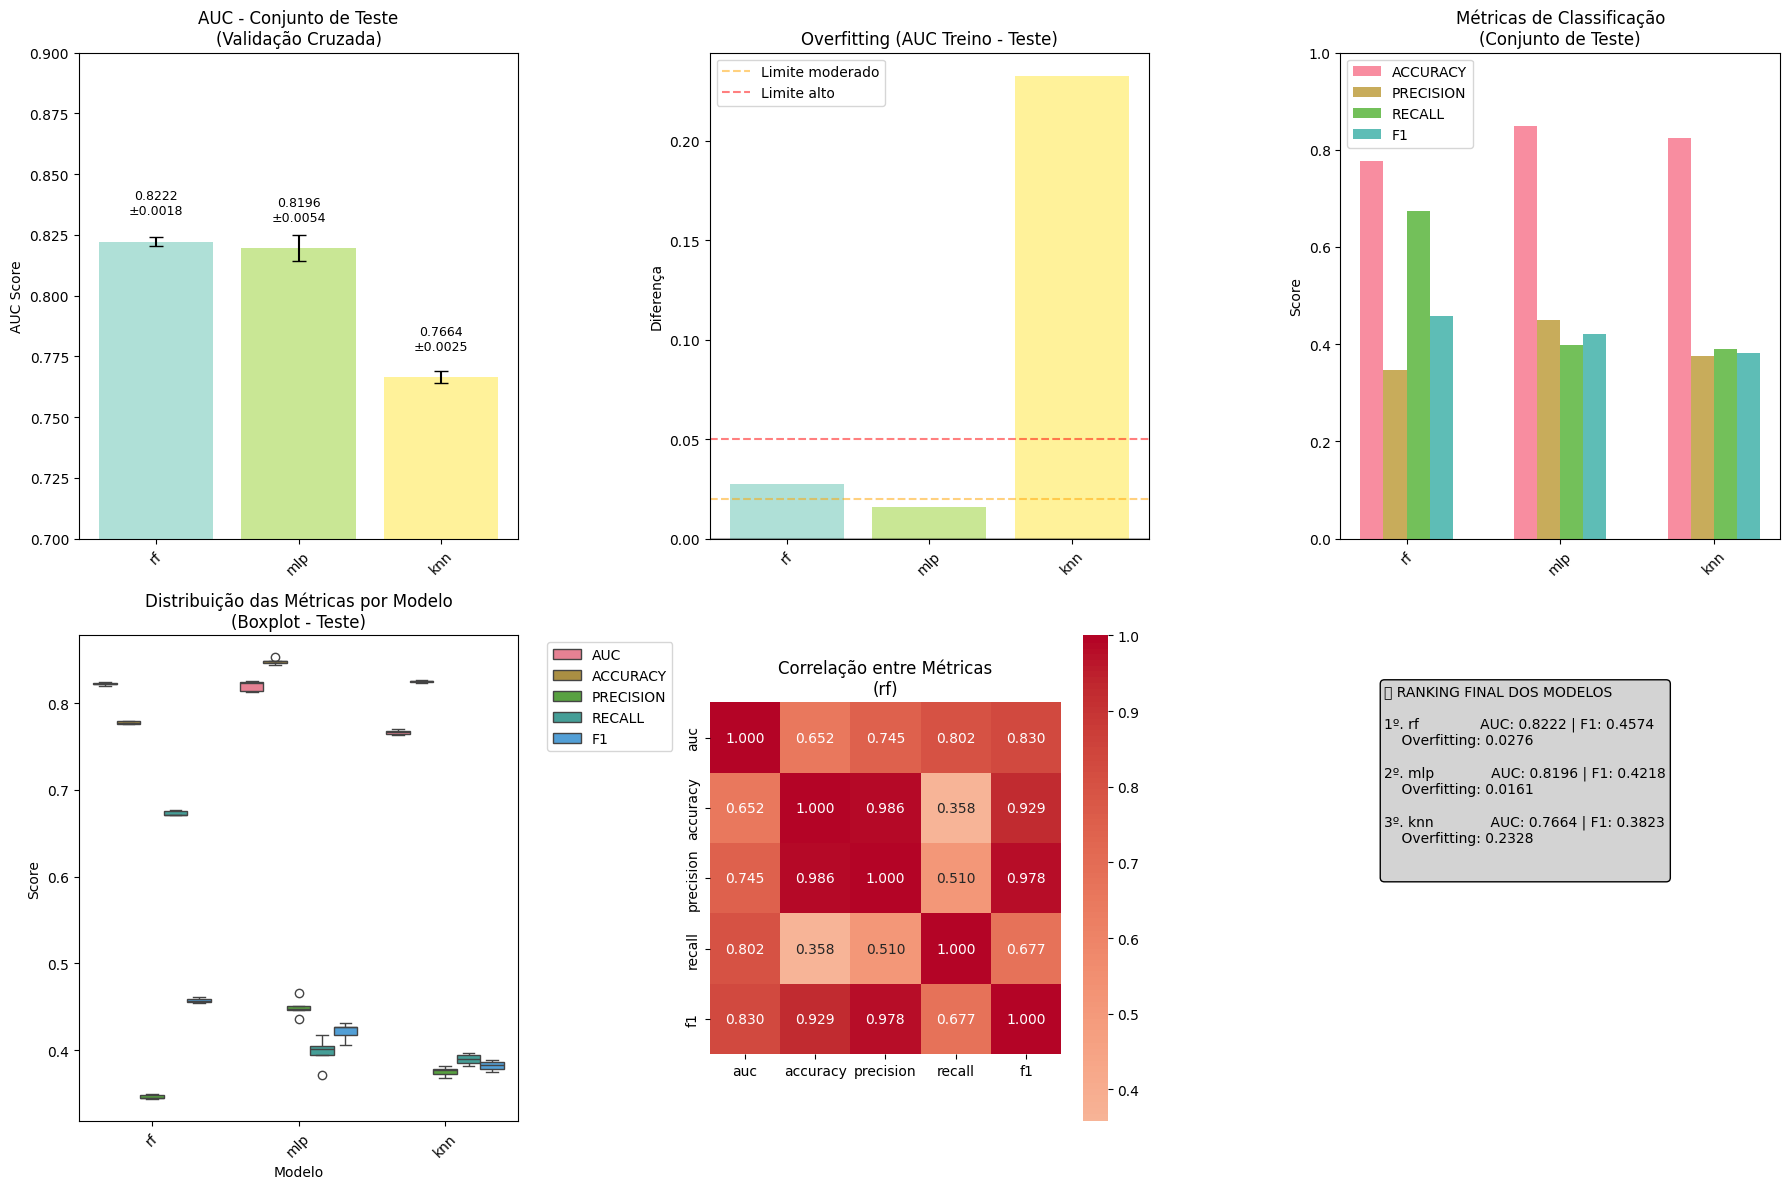

In [144]:
def visualizar_comparacao_cv(metricas_detalhadas):
    """
    Cria visualiza√ß√µes comparativas da valida√ß√£o cruzada
    """
    if not metricas_detalhadas:
        print("‚ùå Nenhum resultado para visualizar!")
        return
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    modelos = list(metricas_detalhadas.keys())
    metricas = list(scoring.keys())
    cores = plt.cm.Set3(np.linspace(0, 1, len(modelos)))
    
    # 1. COMPARA√á√ÉO DE AUC (Teste)
    auc_test_means = [metricas_detalhadas[modelo]['auc']['test_mean'] for modelo in modelos]
    auc_test_stds = [metricas_detalhadas[modelo]['auc']['test_std'] for modelo in modelos]
    
    bars = axes[0, 0].bar(modelos, auc_test_means, yerr=auc_test_stds, 
                         capsize=5, alpha=0.7, color=cores)
    axes[0, 0].set_title('AUC - Conjunto de Teste\n(Valida√ß√£o Cruzada)')
    axes[0, 0].set_ylabel('AUC Score')
    axes[0, 0].set_ylim(0.7, 0.9)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Adicionar valores
    for bar, valor, std in zip(bars, auc_test_means, auc_test_stds):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{valor:.4f}\n¬±{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    # 2. OVERFITTING (Diferen√ßa Treino-Teste)
    overfitting_auc = [metricas_detalhadas[modelo]['auc']['overfitting'] for modelo in modelos]
    
    bars = axes[0, 1].bar(modelos, overfitting_auc, color=cores, alpha=0.7)
    axes[0, 1].set_title('Overfitting (AUC Treino - Teste)')
    axes[0, 1].set_ylabel('Diferen√ßa')
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, 1].axhline(y=0.02, color='orange', linestyle='--', alpha=0.5, label='Limite moderado')
    axes[0, 1].axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='Limite alto')
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. COMPARA√á√ÉO DE M√öLTIPLAS M√âTRICAS (Teste)
    x = np.arange(len(modelos))
    width = 0.15
    
    for i, metric in enumerate(metricas[1:]):  # Excluir AUC que j√° mostramos
        metric_means = [metricas_detalhadas[modelo][metric]['test_mean'] for modelo in modelos]
        axes[0, 2].bar(x + i*width, metric_means, width, label=metric.upper(), alpha=0.8)
    
    axes[0, 2].set_title('M√©tricas de Classifica√ß√£o\n(Conjunto de Teste)')
    axes[0, 2].set_xticks(x + width*1.5)
    axes[0, 2].set_xticklabels(modelos, rotation=45)
    axes[0, 2].set_ylabel('Score')
    axes[0, 2].set_ylim(0, 1)
    axes[0, 2].legend()
    
    # 4. BOXPLOT DAS M√âTRICAS POR MODELO
    metric_data = []
    for modelo in modelos:
        for metric in metricas:
            test_scores = resultados_cv[modelo][f'test_{metric}']
            for score in test_scores:
                metric_data.append({
                    'Modelo': modelo,
                    'M√©trica': metric.upper(),
                    'Score': score
                })
    
    metric_df = pd.DataFrame(metric_data)
    sns.boxplot(data=metric_df, x='Modelo', y='Score', hue='M√©trica', ax=axes[1, 0])
    axes[1, 0].set_title('Distribui√ß√£o das M√©tricas por Modelo\n(Boxplot - Teste)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 5. MATRIZ DE CORRELA√á√ÉO ENTRE M√âTRICAS (usando o melhor modelo)
    melhor_modelo = modelos[np.argmax(auc_test_means)]
    corr_data = {}
    for metric in metricas:
        corr_data[metric] = resultados_cv[melhor_modelo][f'test_{metric}']
    
    corr_df = pd.DataFrame(corr_data)
    correlation_matrix = corr_df.corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1, 1], square=True, fmt='.3f')
    axes[1, 1].set_title(f'Correla√ß√£o entre M√©tricas\n({melhor_modelo})')
    
    # 6. RANKING FINAL DOS MODELOS
    ranking_data = []
    for modelo in modelos:
        auc_mean = metricas_detalhadas[modelo]['auc']['test_mean']
        f1_mean = metricas_detalhadas[modelo]['f1']['test_mean']
        overfitting = metricas_detalhadas[modelo]['auc']['overfitting']
        ranking_data.append({
            'Modelo': modelo,
            'AUC': auc_mean,
            'F1': f1_mean,
            'Overfitting': overfitting
        })
    
    ranking_df = pd.DataFrame(ranking_data).sort_values('AUC', ascending=False)
    
    axes[1, 2].axis('off')
    ranking_text = "üèÜ RANKING FINAL DOS MODELOS\n\n"
    for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
        ranking_text += f"{i}¬∫. {row['Modelo']:15} AUC: {row['AUC']:.4f} | F1: {row['F1']:.4f}\n"
        ranking_text += f"    Overfitting: {row['Overfitting']:.4f}\n\n"
    
    axes[1, 2].text(0.1, 0.9, ranking_text, fontsize=10, verticalalignment='top', 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    
    plt.tight_layout()
    plt.show()
    
    return ranking_df


ranking_final = visualizar_comparacao_cv(metricas_detalhadas)

In [146]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('correlation_selector',
                 CorrelationFeatureSelector(threshold=0.05)),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('smote',
                 SMOTE(k_neighbors=3, random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=15,
                                      weights='distance'))])

In [147]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=12, min_samples_leaf=8,
                                        min_samples_split=15, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [148]:
pipeline_mlp.fit(X_train, y_train)

Pipeline(steps=[('correlation_selector', CorrelationFeatureSelector()),
                ('feature_engineer', AdvancedFeatureEngineer()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('power_transform', PowerTransformer()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier',
                 MLPClassifier(alpha=0.01, batch_size=256, early_stopping=True,
                               hidden_layer_sizes=(100, 50, 25),
                               learning_rate='adaptive', max_iter=500,
                               random_state=42))])

## Predi√ß√µes no teste: 

In [153]:
## knn

In [154]:
# 2. FAZER PREDI√á√ïES NO TESTE
y_pred = pipeline_knn.predict(X_test)
y_pred_proba = pipeline_knn.predict_proba(X_test)[:, 1]

# 3. CALCULAR M√âTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"üéØ Acur√°cia: {accuracy:.4f}")
print(f"üìà Precis√£o: {precision:.4f}")
print(f"üìä Recall: {recall:.4f}")
print(f"‚ö° F1-Score: {f1:.4f}")
print(f"üìâ AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUS√ÉO
print(f"\nüéØ MATRIZ DE CONFUS√ÉO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELAT√ìRIO DE CLASSIFICA√á√ÉO
print(f"\nüìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:")
print(classification_report(y_test, y_pred, target_names=['N√£o Diab√©tico', 'Diab√©tico']))

üéØ Acur√°cia: 0.8241
üìà Precis√£o: 0.3737
üìä Recall: 0.3876
‚ö° F1-Score: 0.3805
üìâ AUC: 0.7641

üéØ MATRIZ DE CONFUS√ÉO:
[[39074  4593]
 [ 4329  2740]]

üìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:
               precision    recall  f1-score   support

N√£o Diab√©tico       0.90      0.89      0.90     43667
    Diab√©tico       0.37      0.39      0.38      7069

     accuracy                           0.82     50736
    macro avg       0.64      0.64      0.64     50736
 weighted avg       0.83      0.82      0.83     50736



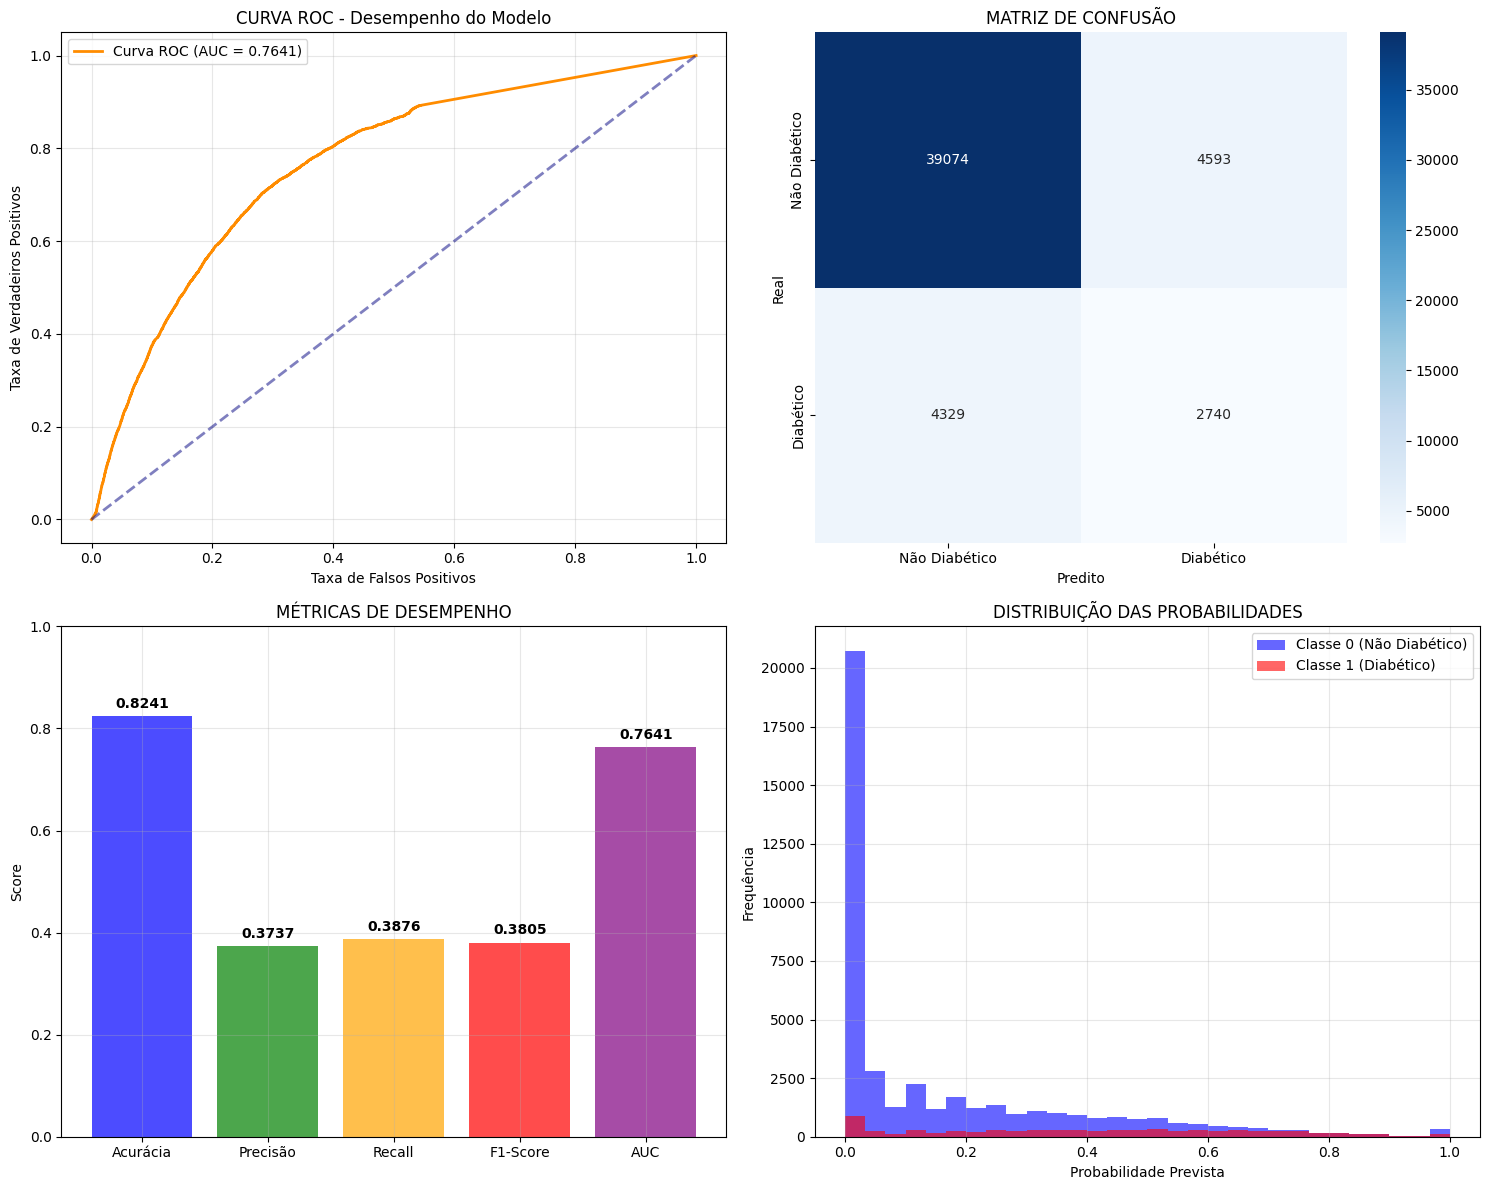

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUS√ÉO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['N√£o Diab√©tico', 'Diab√©tico'],
            yticklabels=['N√£o Diab√©tico', 'Diab√©tico'])
axes[0, 1].set_title('MATRIZ DE CONFUS√ÉO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. M√âTRICAS PRINCIPAIS
metrics_names = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('M√âTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUI√á√ÉO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"N√£o Diab√©tico" if classe == 0 else "Diab√©tico"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequ√™ncia')
axes[1, 1].set_title('DISTRIBUI√á√ÉO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## rf

In [156]:
# 2. FAZER PREDI√á√ïES NO TESTE
y_pred = pipeline_rf.predict(X_test)
y_pred_proba = pipeline_rf.predict_proba(X_test)[:, 1]

# 3. CALCULAR M√âTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"üéØ Acur√°cia: {accuracy:.4f}")
print(f"üìà Precis√£o: {precision:.4f}")
print(f"üìä Recall: {recall:.4f}")
print(f"‚ö° F1-Score: {f1:.4f}")
print(f"üìâ AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUS√ÉO
print(f"\nüéØ MATRIZ DE CONFUS√ÉO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELAT√ìRIO DE CLASSIFICA√á√ÉO
print(f"\nüìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:")
print(classification_report(y_test, y_pred, target_names=['N√£o Diab√©tico', 'Diab√©tico']))

üéØ Acur√°cia: 0.7744
üìà Precis√£o: 0.3421
üìä Recall: 0.6710
‚ö° F1-Score: 0.4532
üìâ AUC: 0.8180

üéØ MATRIZ DE CONFUS√ÉO:
[[34546  9121]
 [ 2326  4743]]

üìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:
               precision    recall  f1-score   support

N√£o Diab√©tico       0.94      0.79      0.86     43667
    Diab√©tico       0.34      0.67      0.45      7069

     accuracy                           0.77     50736
    macro avg       0.64      0.73      0.66     50736
 weighted avg       0.85      0.77      0.80     50736



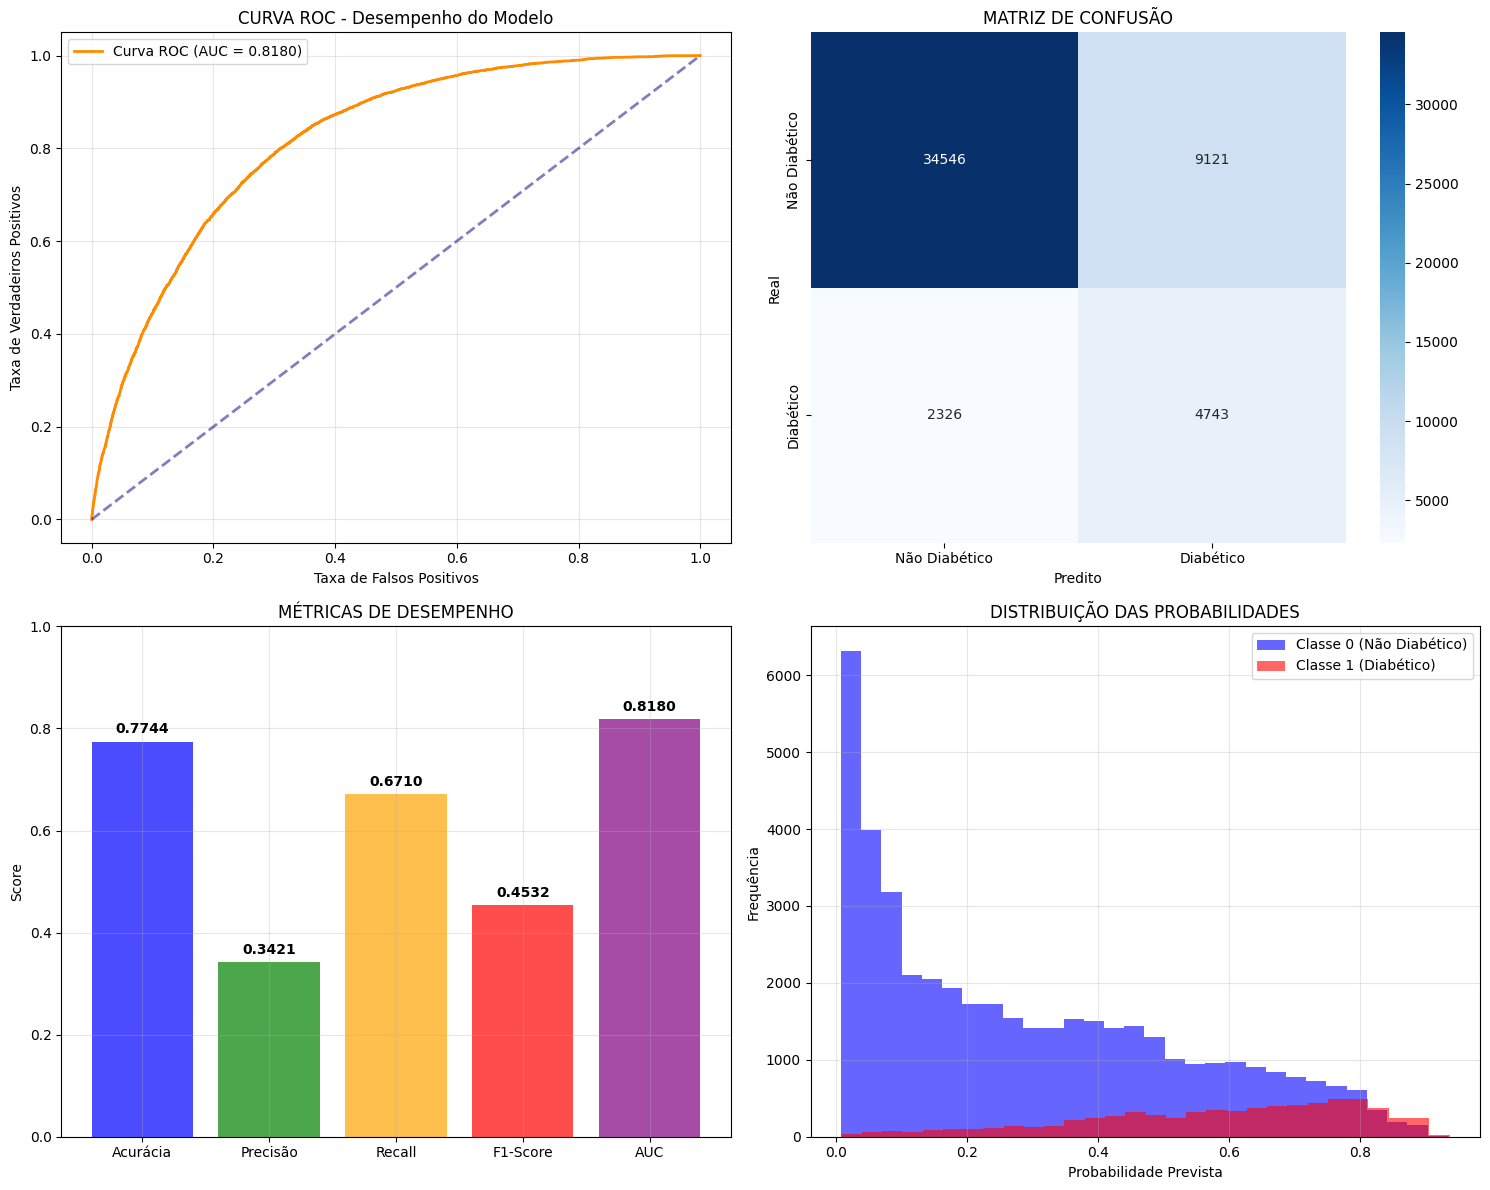

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUS√ÉO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['N√£o Diab√©tico', 'Diab√©tico'],
            yticklabels=['N√£o Diab√©tico', 'Diab√©tico'])
axes[0, 1].set_title('MATRIZ DE CONFUS√ÉO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. M√âTRICAS PRINCIPAIS
metrics_names = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('M√âTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUI√á√ÉO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"N√£o Diab√©tico" if classe == 0 else "Diab√©tico"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequ√™ncia')
axes[1, 1].set_title('DISTRIBUI√á√ÉO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [158]:
## mlp

In [159]:
# 2. FAZER PREDI√á√ïES NO TESTE
y_pred = pipeline_mlp.predict(X_test)
y_pred_proba = pipeline_mlp.predict_proba(X_test)[:, 1]

# 3. CALCULAR M√âTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"üéØ Acur√°cia: {accuracy:.4f}")
print(f"üìà Precis√£o: {precision:.4f}")
print(f"üìä Recall: {recall:.4f}")
print(f"‚ö° F1-Score: {f1:.4f}")
print(f"üìâ AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUS√ÉO
print(f"\nüéØ MATRIZ DE CONFUS√ÉO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELAT√ìRIO DE CLASSIFICA√á√ÉO
print(f"\nüìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:")
print(classification_report(y_test, y_pred, target_names=['N√£o Diab√©tico', 'Diab√©tico']))

üéØ Acur√°cia: 0.8480
üìà Precis√£o: 0.4415
üìä Recall: 0.3440
‚ö° F1-Score: 0.3867
üìâ AUC: 0.8079

üéØ MATRIZ DE CONFUS√ÉO:
[[40590  3077]
 [ 4637  2432]]

üìã RELAT√ìRIO DE CLASSIFICA√á√ÉO:
               precision    recall  f1-score   support

N√£o Diab√©tico       0.90      0.93      0.91     43667
    Diab√©tico       0.44      0.34      0.39      7069

     accuracy                           0.85     50736
    macro avg       0.67      0.64      0.65     50736
 weighted avg       0.83      0.85      0.84     50736



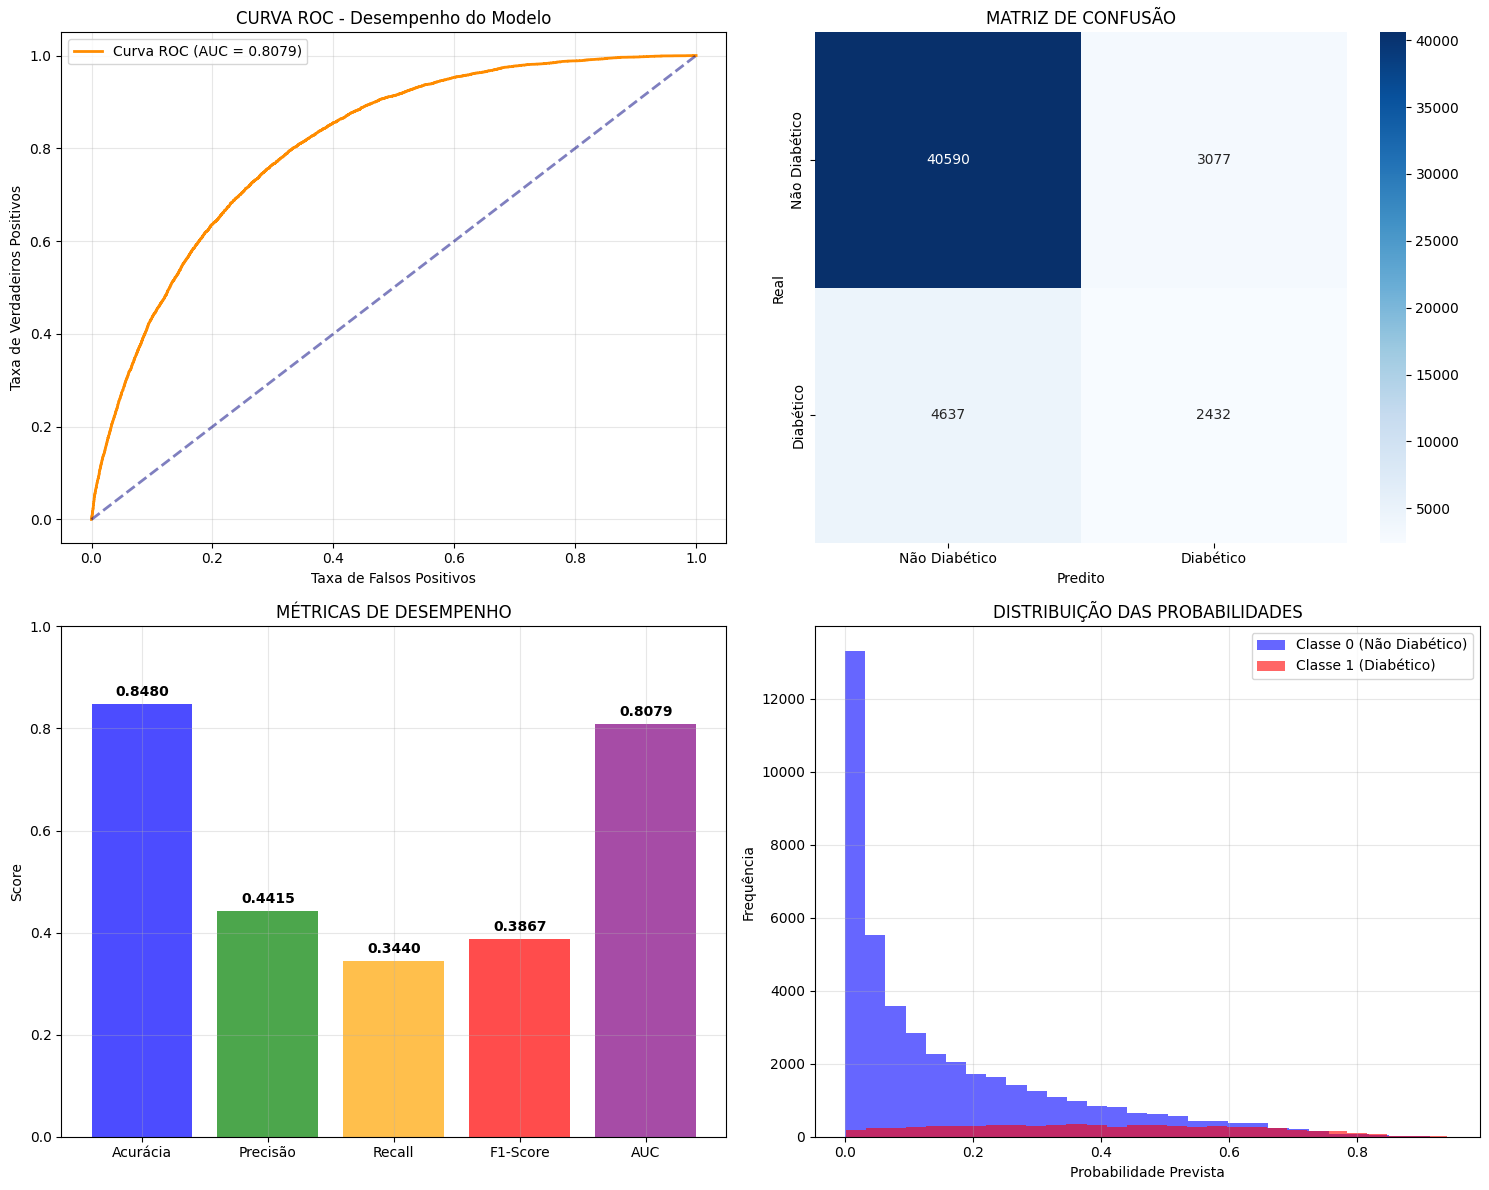

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUS√ÉO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['N√£o Diab√©tico', 'Diab√©tico'],
            yticklabels=['N√£o Diab√©tico', 'Diab√©tico'])
axes[0, 1].set_title('MATRIZ DE CONFUS√ÉO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. M√âTRICAS PRINCIPAIS
metrics_names = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('M√âTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUI√á√ÉO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"N√£o Diab√©tico" if classe == 0 else "Diab√©tico"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequ√™ncia')
axes[1, 1].set_title('DISTRIBUI√á√ÉO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()